In [2]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from pandas.tools.plotting import autocorrelation_plot

def parser(x):
    return pd.datetime.strptime(x, '%d/%m/%y %H')

data = read_csv('../data/BATADAL_dataset03.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)

data2 = read_csv('../data/BATADAL_dataset04.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)

series1 = data.copy()
date = series1.index
label = series1.iloc[:,-1]

series1.index = range(len(data))
sensors = data.iloc[:,:7]


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.006432171620535719


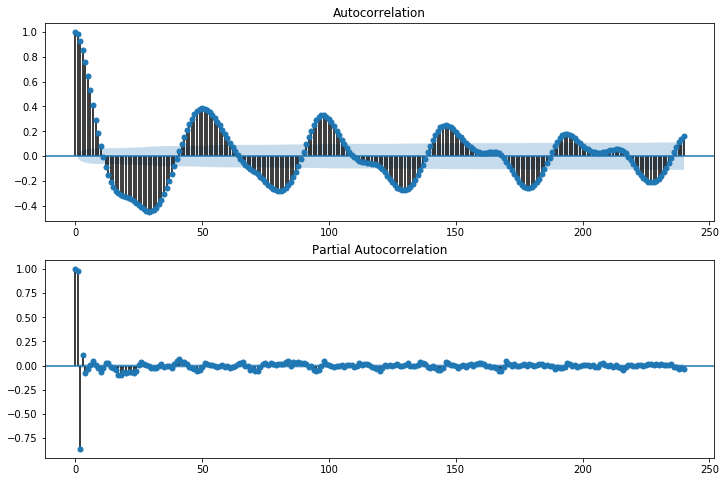

In [3]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series1.iloc[:,0].values.squeeze(), lags=240, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series1.iloc[:,0], lags=240, ax=ax2)
plt.savefig('d1_par_auto.png', dpi=300, bbox_inches='tight')
print(sm.stats.durbin_watson(series1.iloc[:,0]))


In [4]:
import statsmodels.api as sm

arma_mod = []
q_list=[]
p_list=[]

no_model_list = []
for idx in range(len(data.columns)-1):
    aic = []
    Mod = []
    P = []
    Q = []
    for p in range(1,6):
        for q in range(4):
            try:
                mod = sm.tsa.ARMA(data.iloc[:,idx],(p,q)).fit(disp=0)
                Mod.append(mod)
        #     print(mod.params)
                aic.append(mod.aic)
#                 print("AIC: " + str(mod.aic))
                P.append(p)
                Q.append(q)
            except:
                pass
    if aic==[]:
        no_model_list.append(idx)
        p_list.append(0)
        q_list.append(0)
        arma_mod.append(0)
        pass
    else:
        index_min = np.argmin(aic)
        print(index_min)
        print("optimal p,q: " + str(P[index_min])+','+str(Q[index_min]))
        arma_mod.append(Mod[index_min])
        p_list.append(P[index_min])
        q_list.append(Q[index_min])


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to con

17
optimal p,q: 5,1


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:610: RuntimeWarning: invalid value encountered in double_scalars
  (1-a**2)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:612: RuntimeWarning: divide by zero encountered in true_divide
  invarcoefs = -np.log((1-params)/(1+params))
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


15
optimal p,q: 4,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


19
optimal p,q: 5,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


18
optimal p,q: 5,2


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


15
optimal p,q: 4,3
15
optimal p,q: 4,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


19
optimal p,q: 5,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10
optimal p,q: 3,2


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10
optimal p,q: 5,2


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


13
optimal p,q: 4,2


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2
optimal p,q: 1,2


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


14
optimal p,q: 4,2
13
optimal p,q: 4,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


14
optimal p,q: 4,2


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to c

1
optimal p,q: 1,1
15
optimal p,q: 4,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to c

13
optimal p,q: 4,2


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10
optimal p,q: 3,2


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to c

15
optimal p,q: 4,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


13
optimal p,q: 4,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1

15
optimal p,q: 4,3
18
optimal p,q: 5,2


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()


15
optimal p,q: 4,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


13
optimal p,q: 4,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


15
optimal p,q: 4,3
19
optimal p,q: 5,3
19
optimal p,q: 5,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


15
optimal p,q: 4,3


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


pro: 0.052429973665310034


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


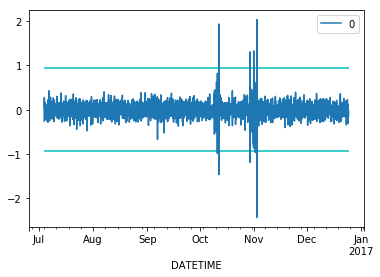

0    0.935958
Name: 0.998, dtype: float64


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


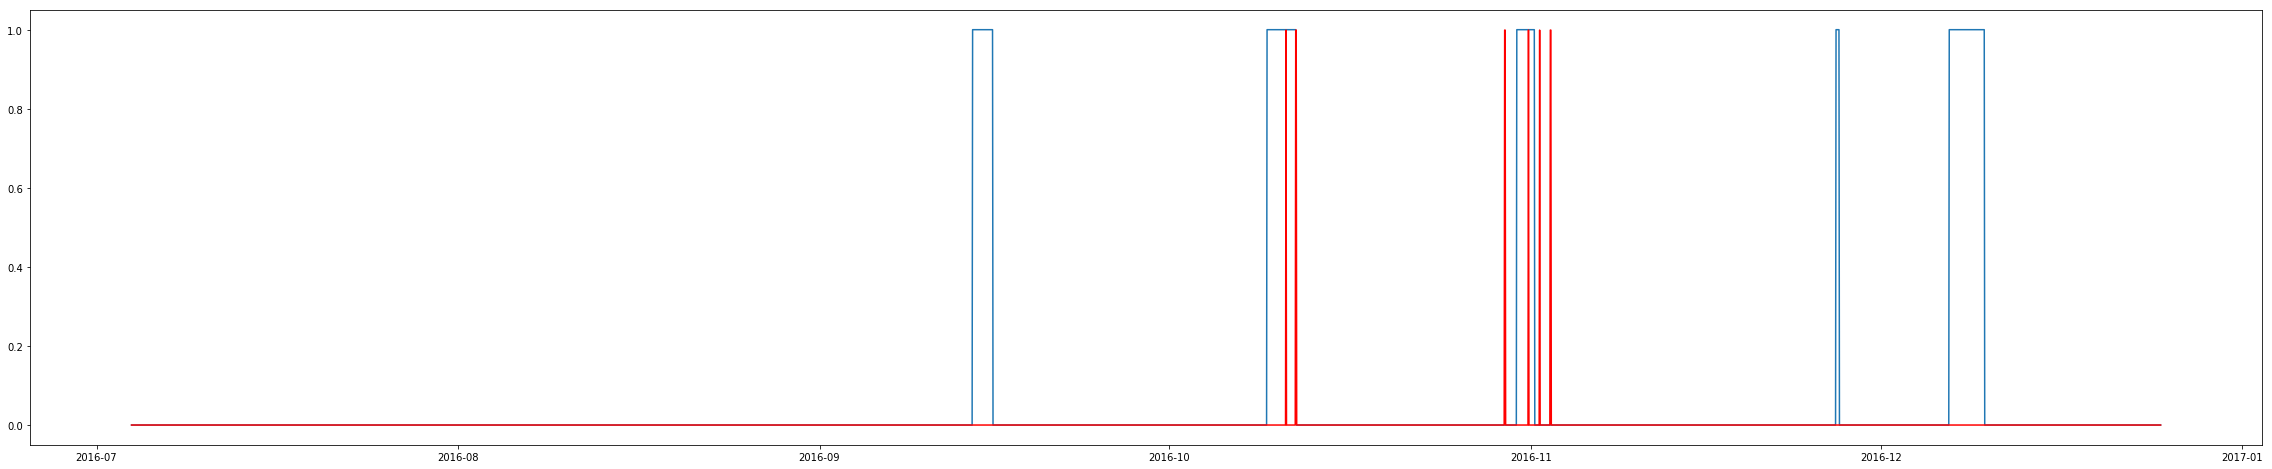

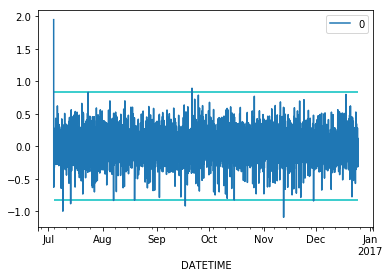

0    0.830398
Name: 0.998, dtype: float64


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


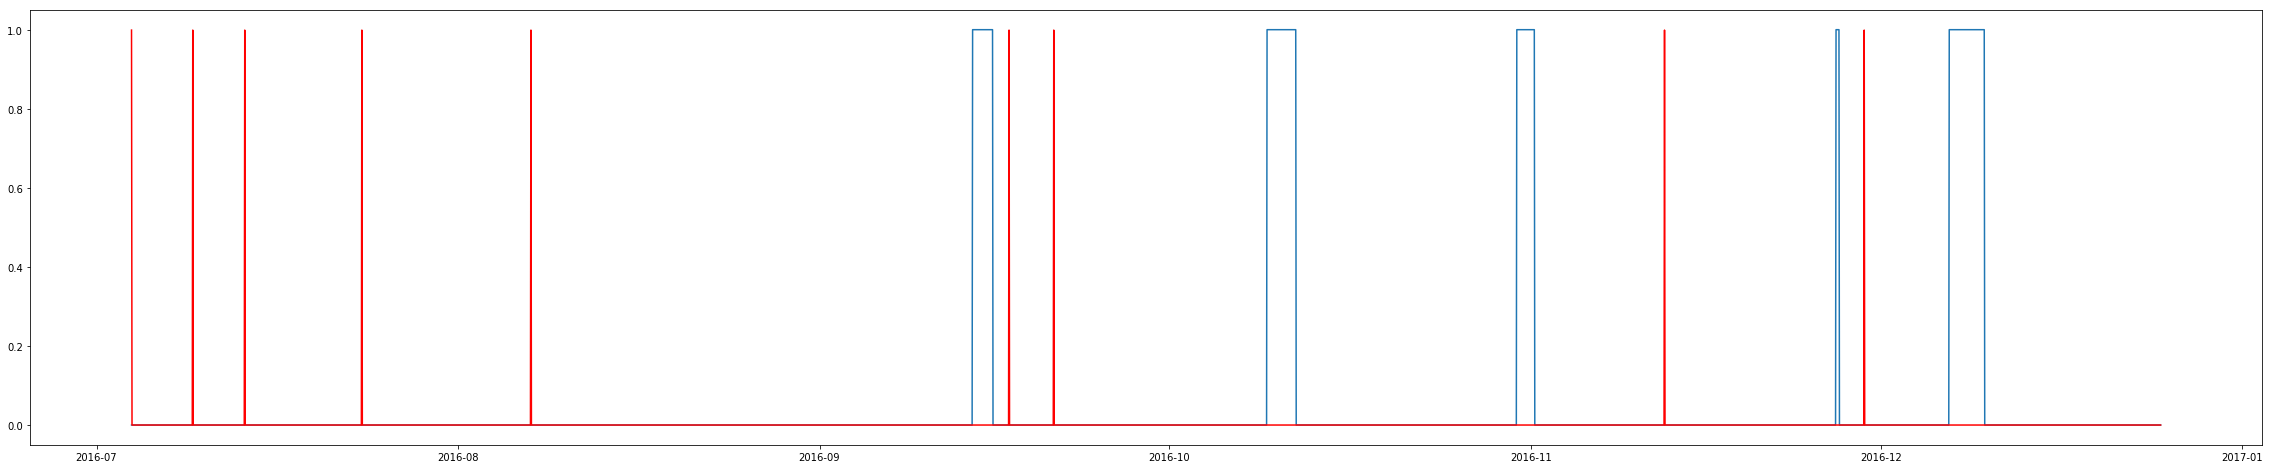

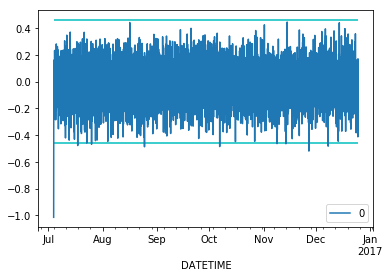

0    0.462791
Name: 0.998, dtype: float64


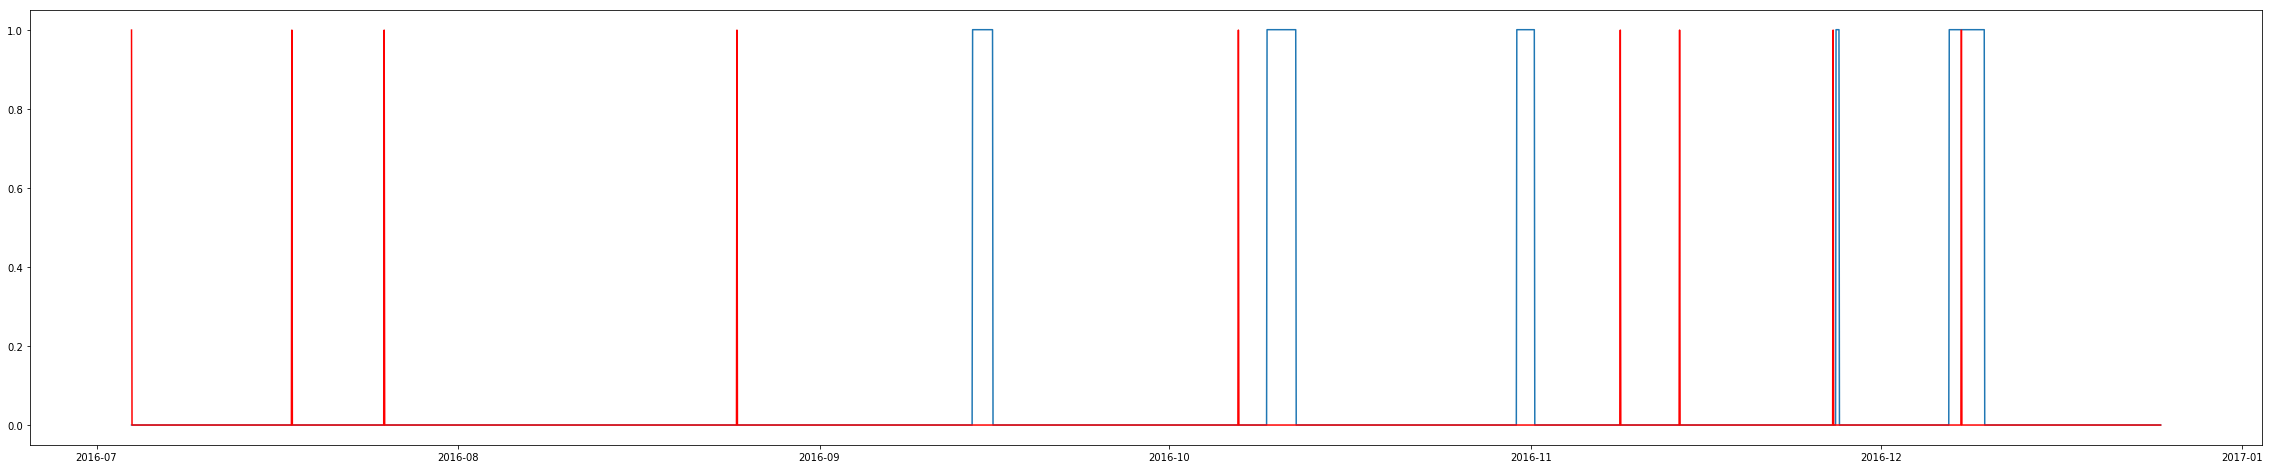

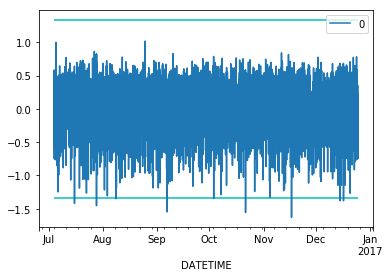

0    1.339828
Name: 0.998, dtype: float64


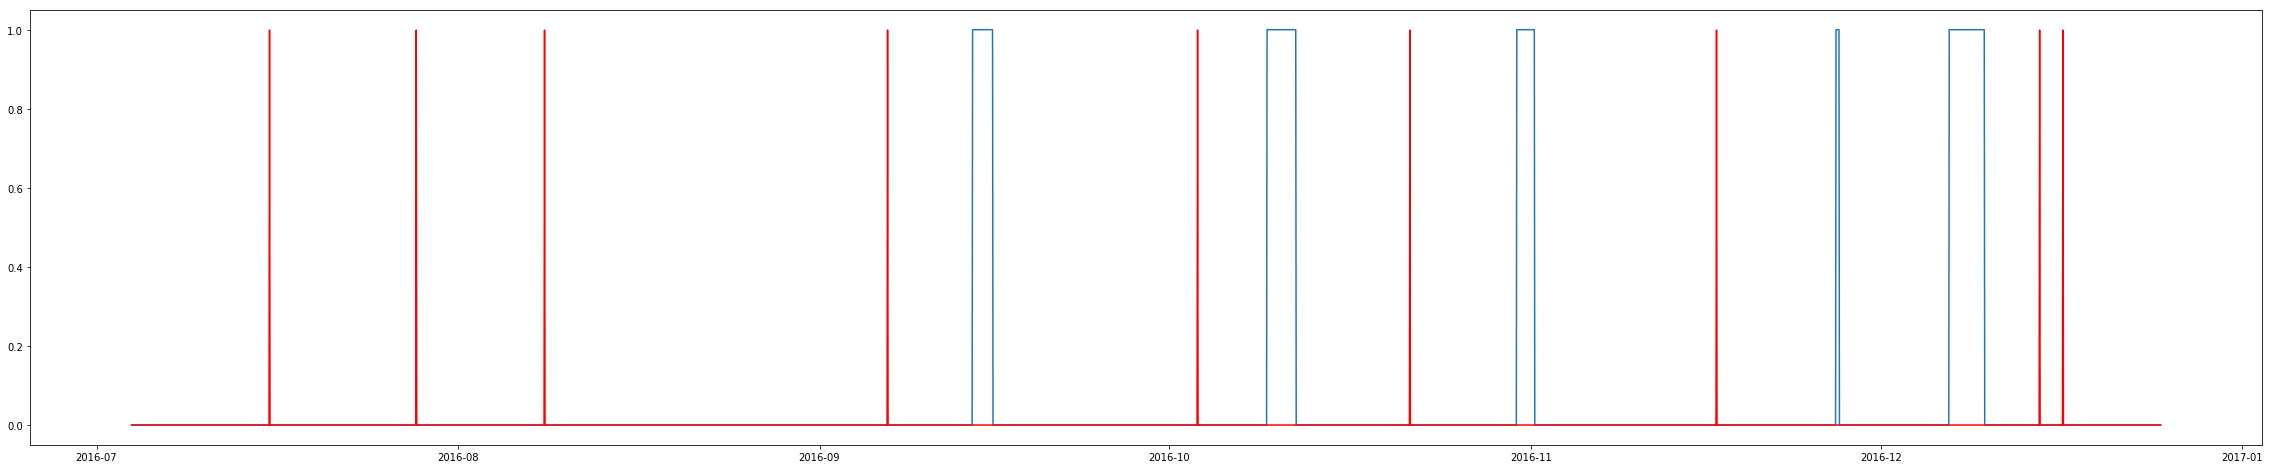

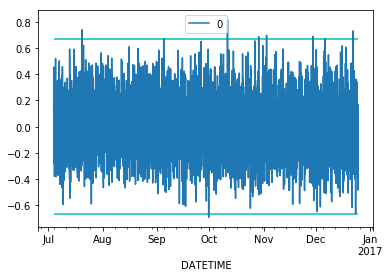

0    0.669619
Name: 0.998, dtype: float64


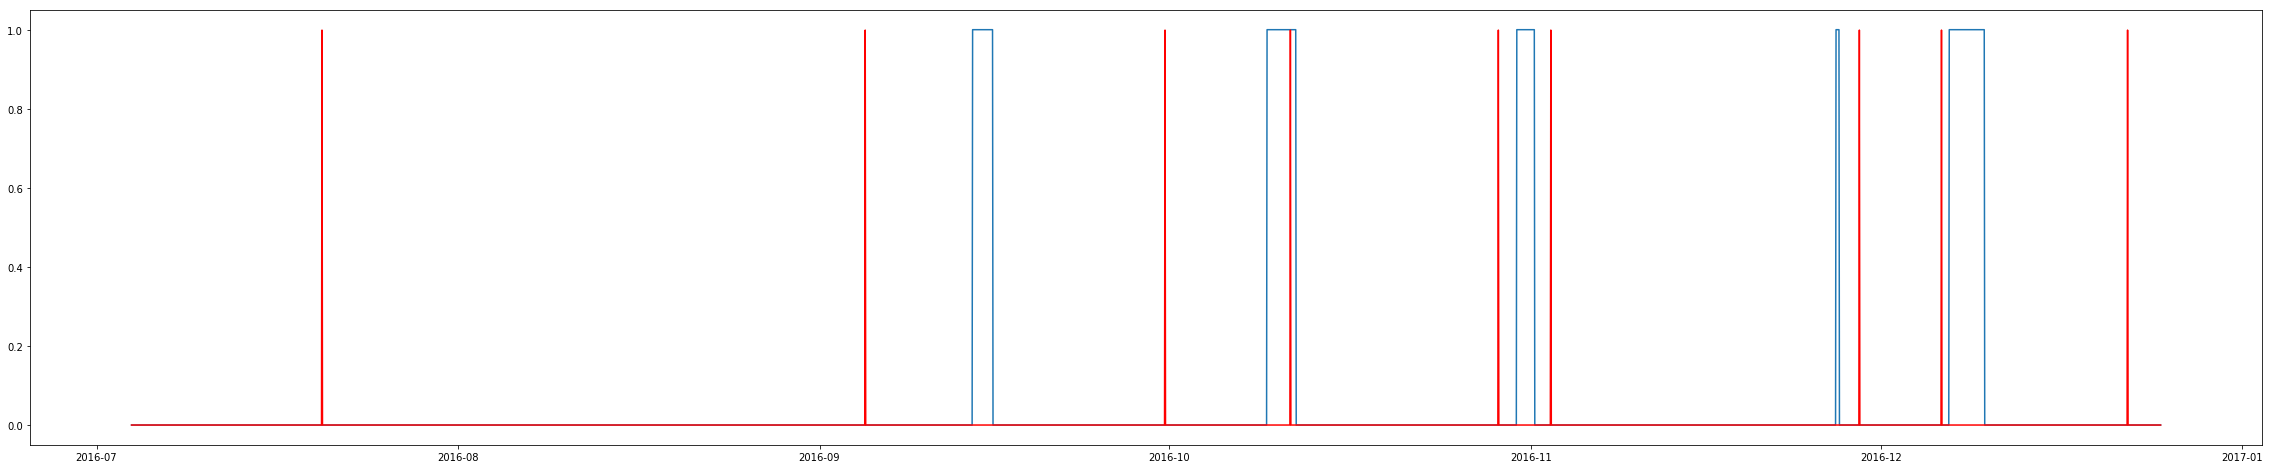

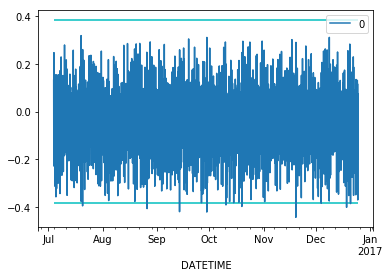

0    0.384359
Name: 0.998, dtype: float64


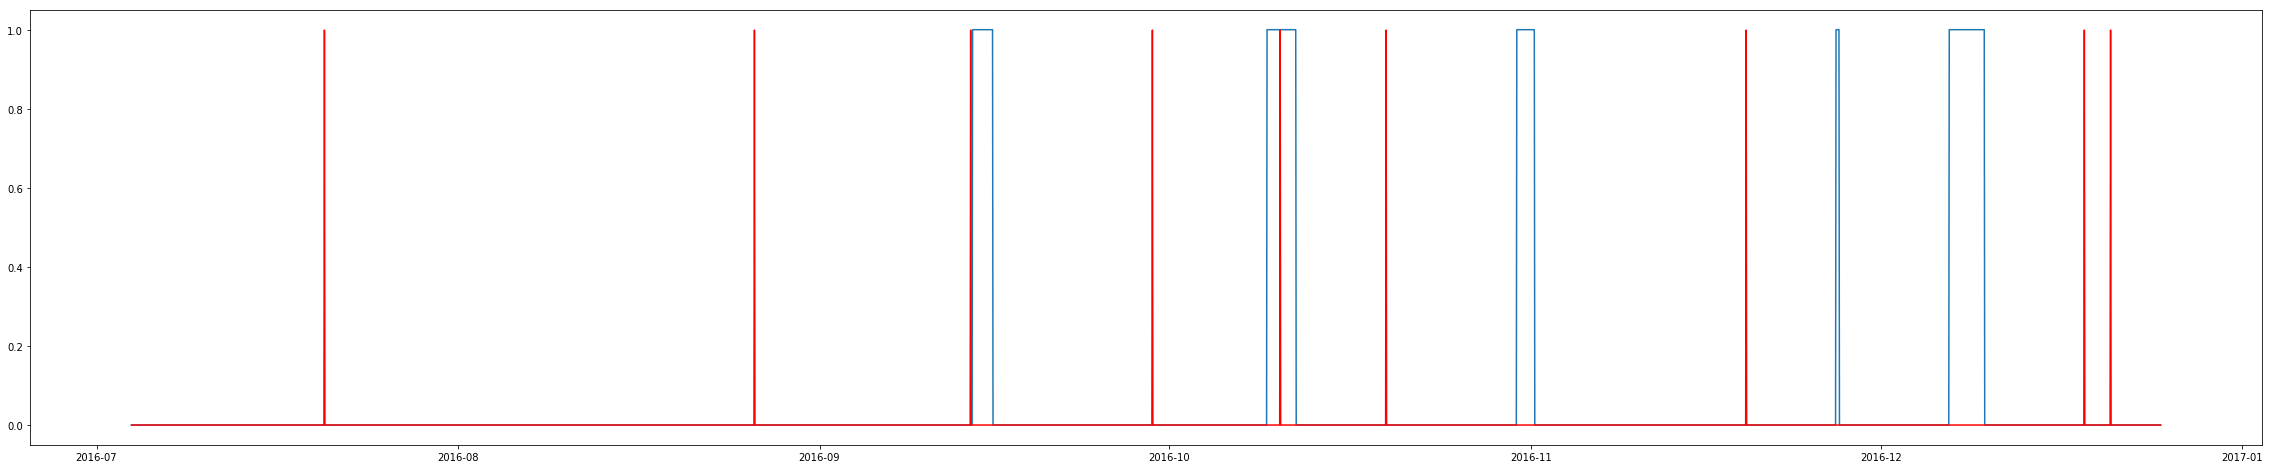

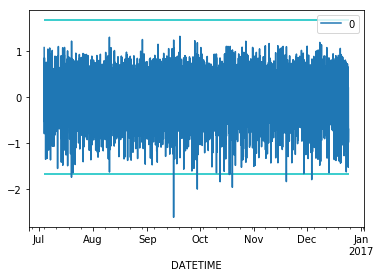

0    1.67218
Name: 0.998, dtype: float64


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/lizy/anaconda3/lib/

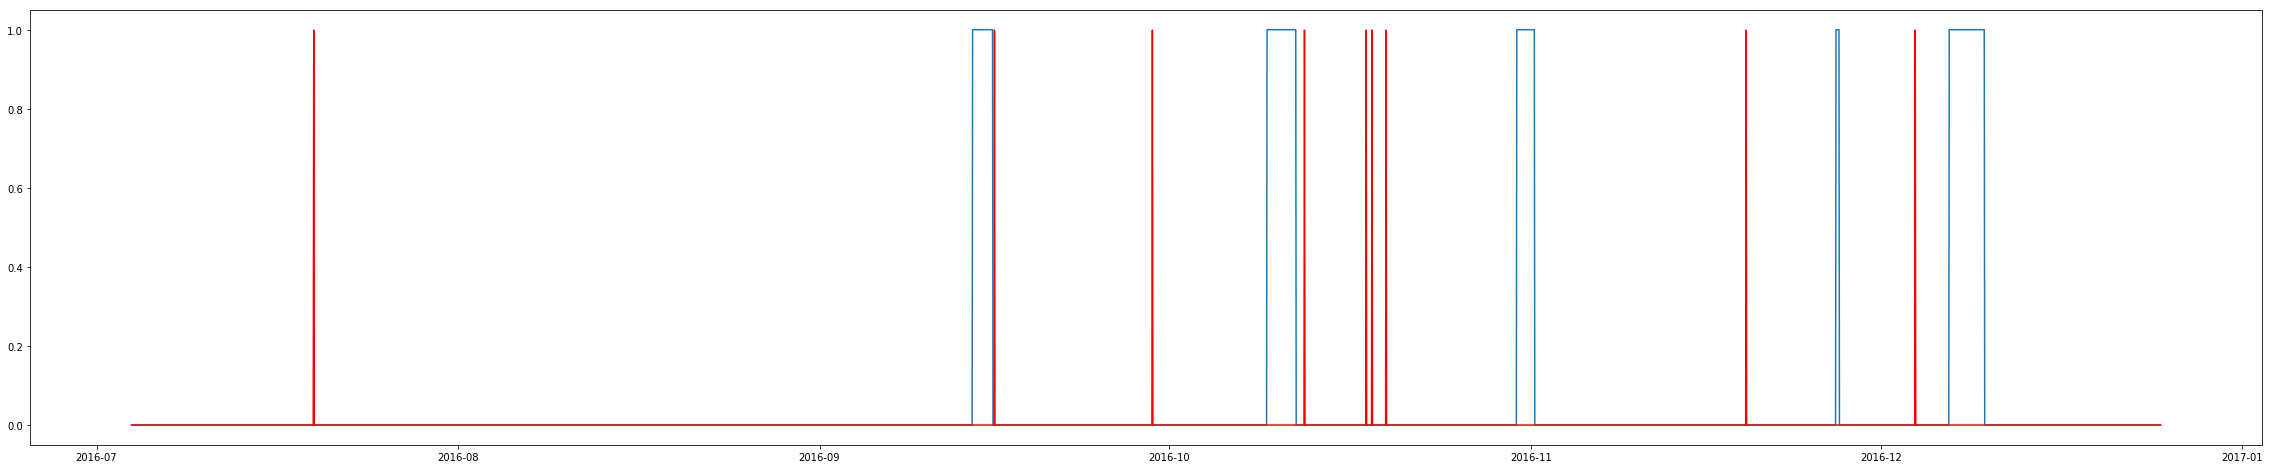

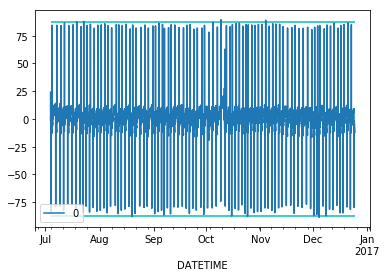

0    87.5353
Name: 0.998, dtype: float64


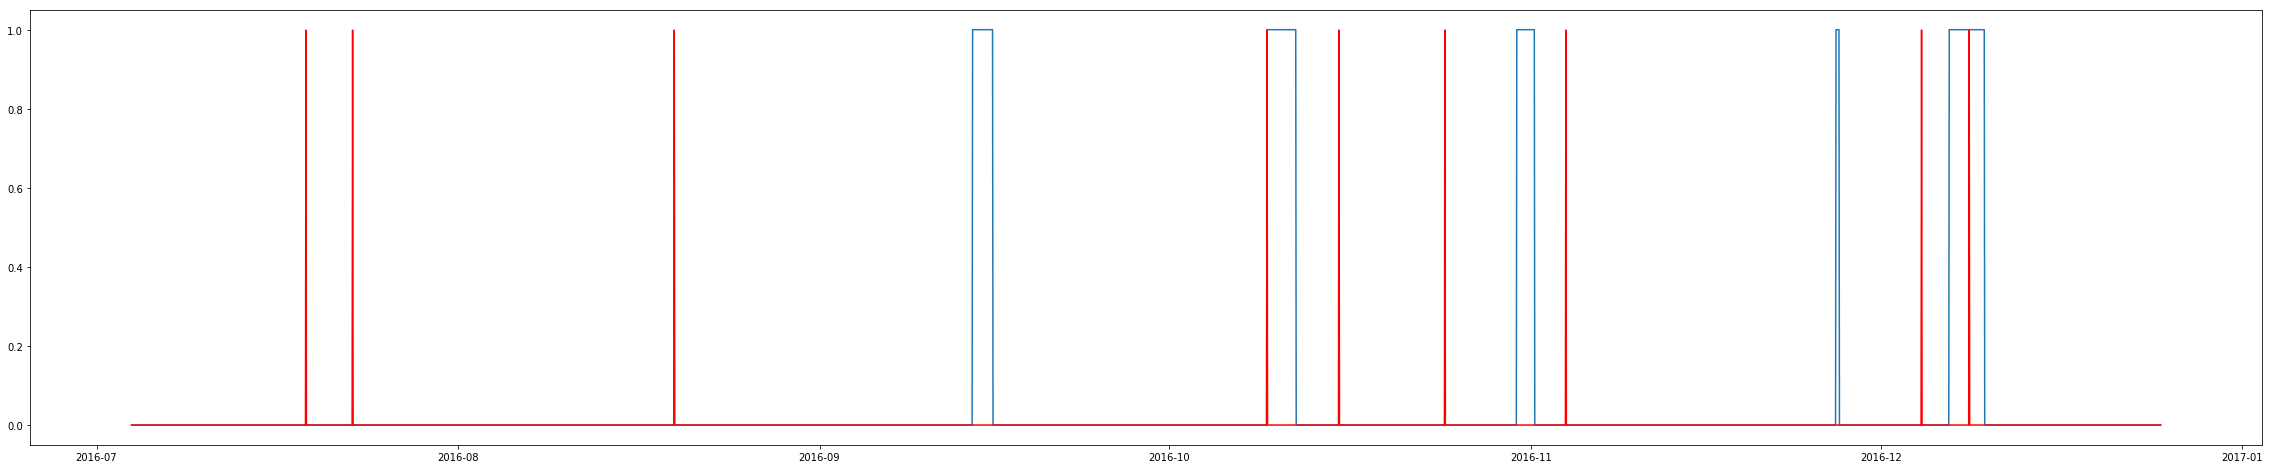

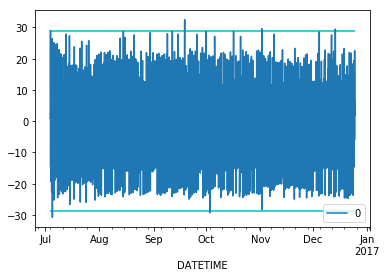

0    28.693764
Name: 0.998, dtype: float64


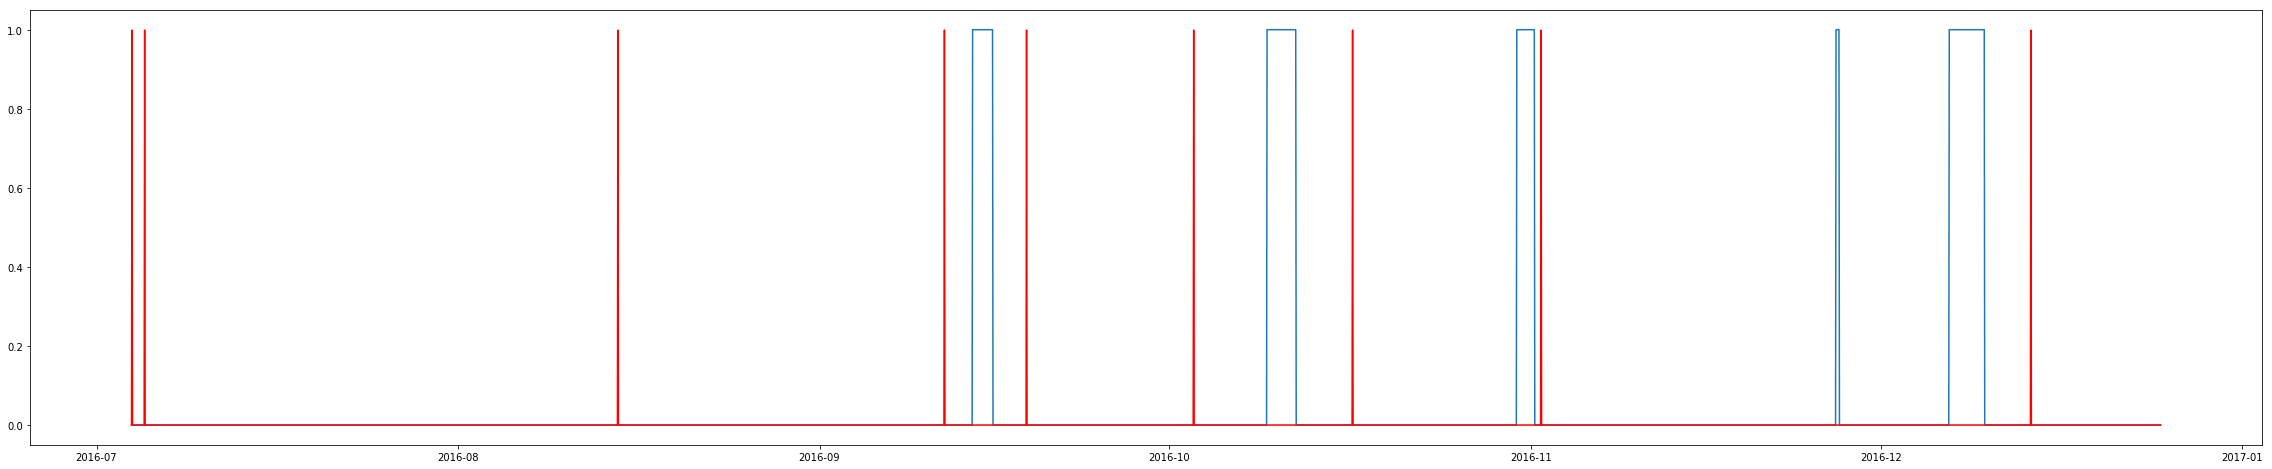

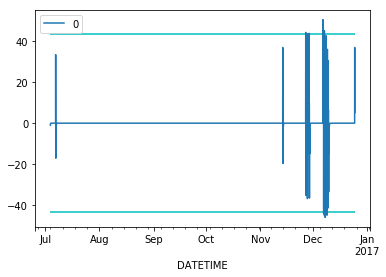

0    43.233369
Name: 0.998, dtype: float64


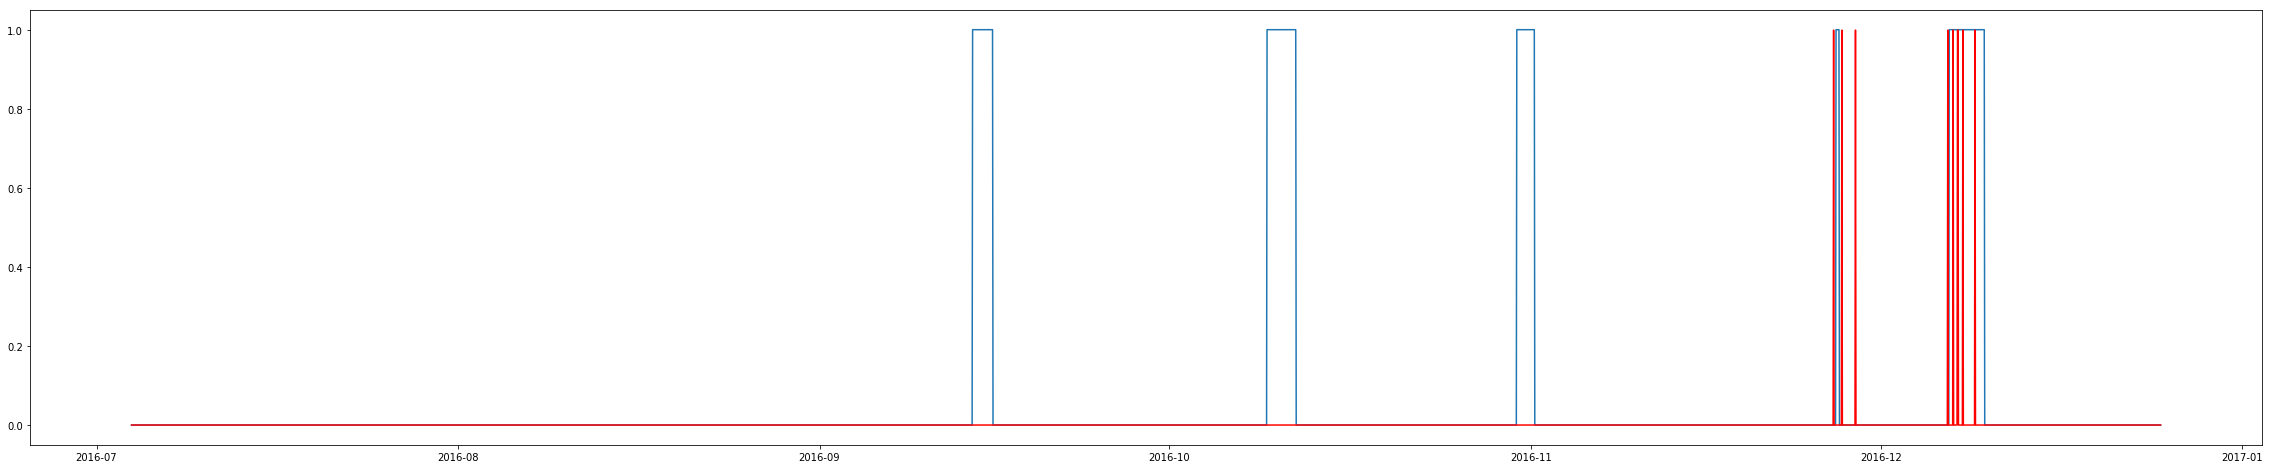

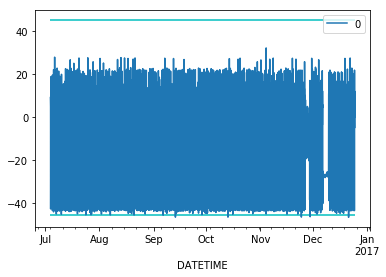

0    45.346288
Name: 0.998, dtype: float64


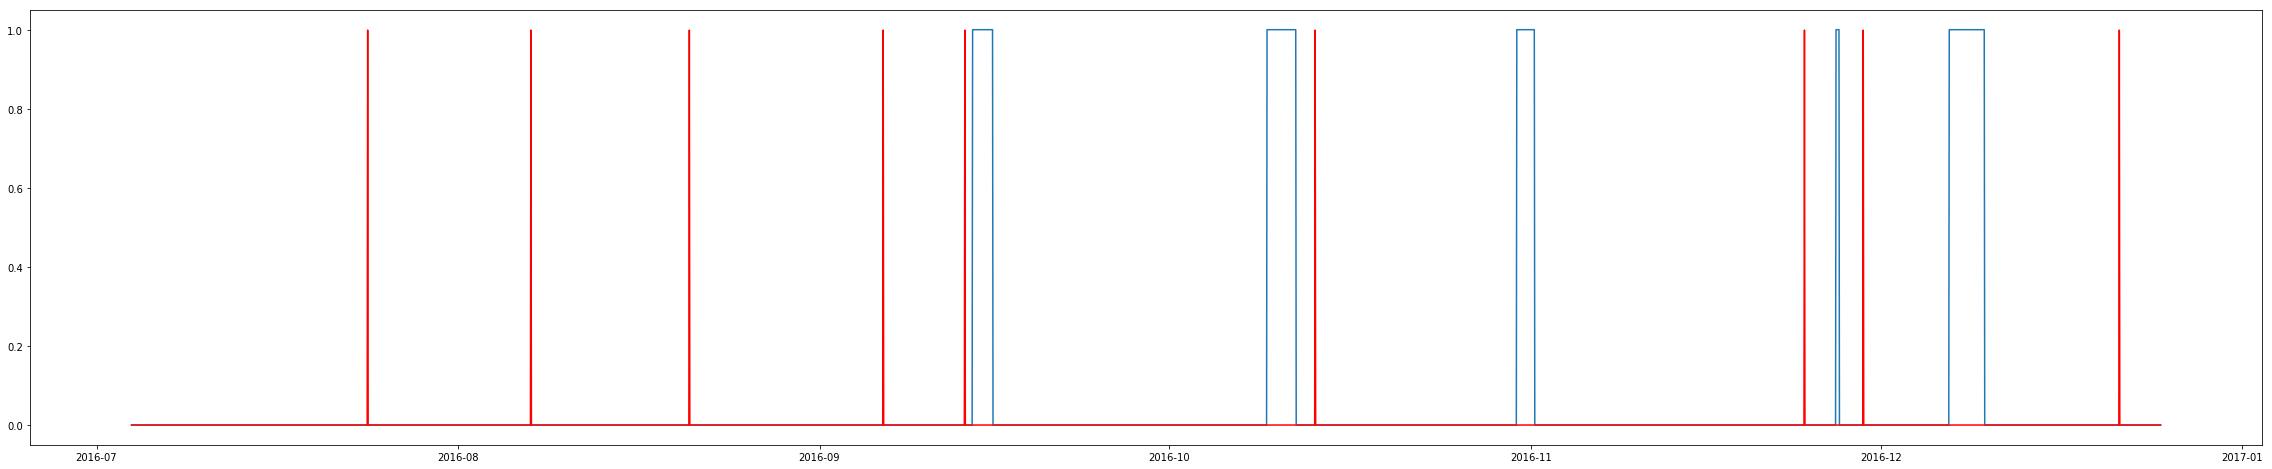

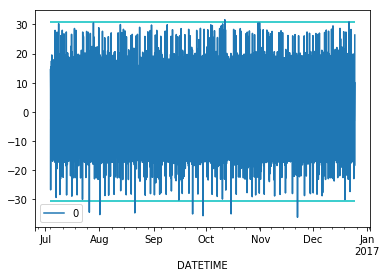

0    30.772883
Name: 0.998, dtype: float64


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


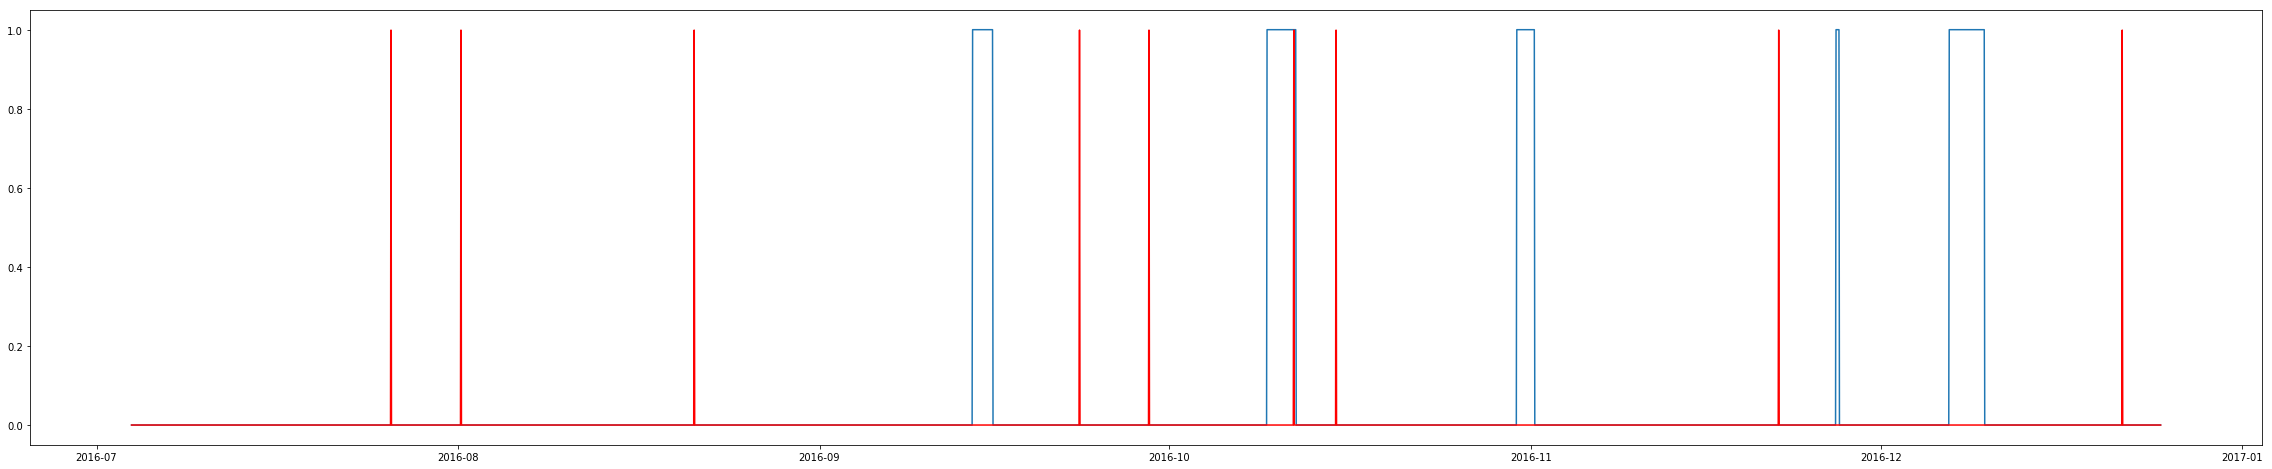

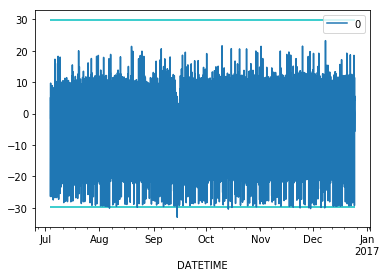

0    29.847019
Name: 0.998, dtype: float64


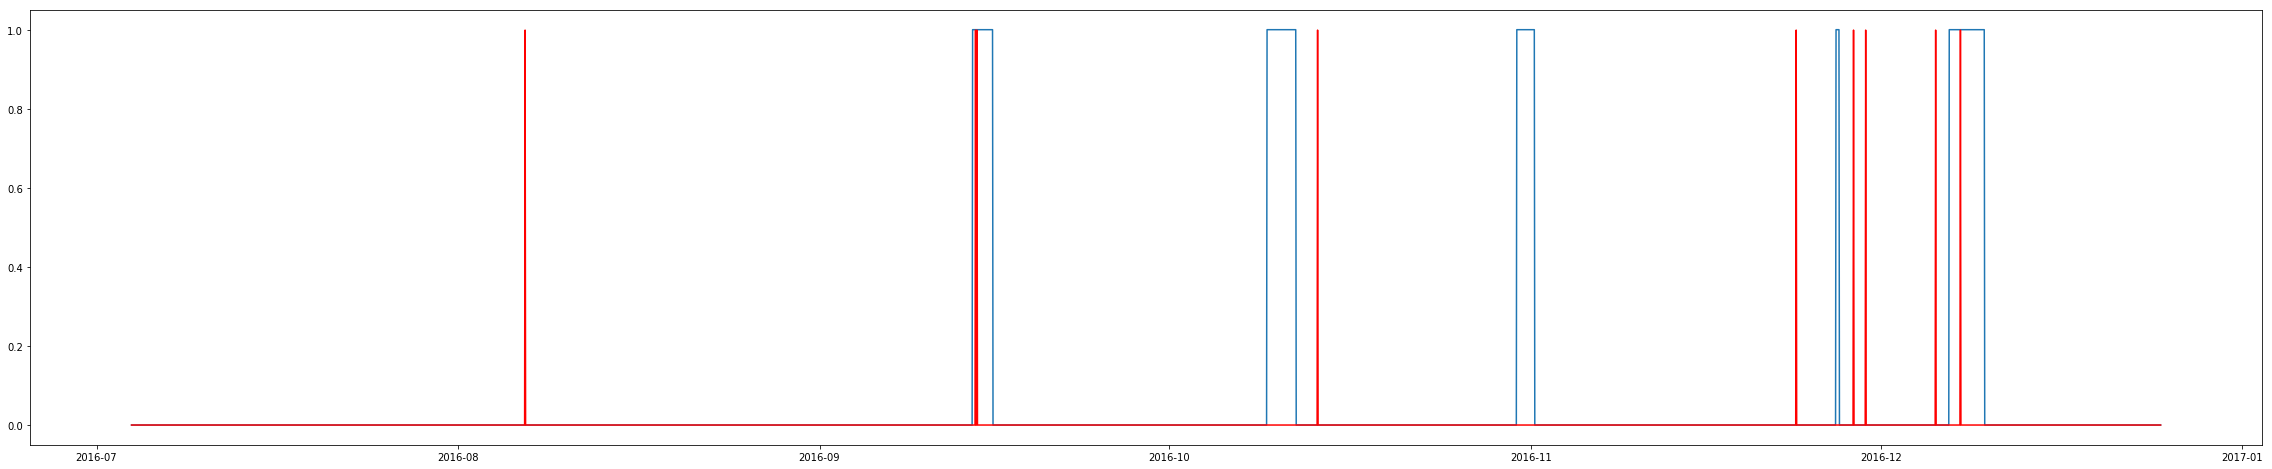

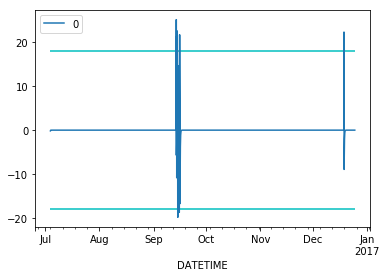

0    17.865718
Name: 0.998, dtype: float64


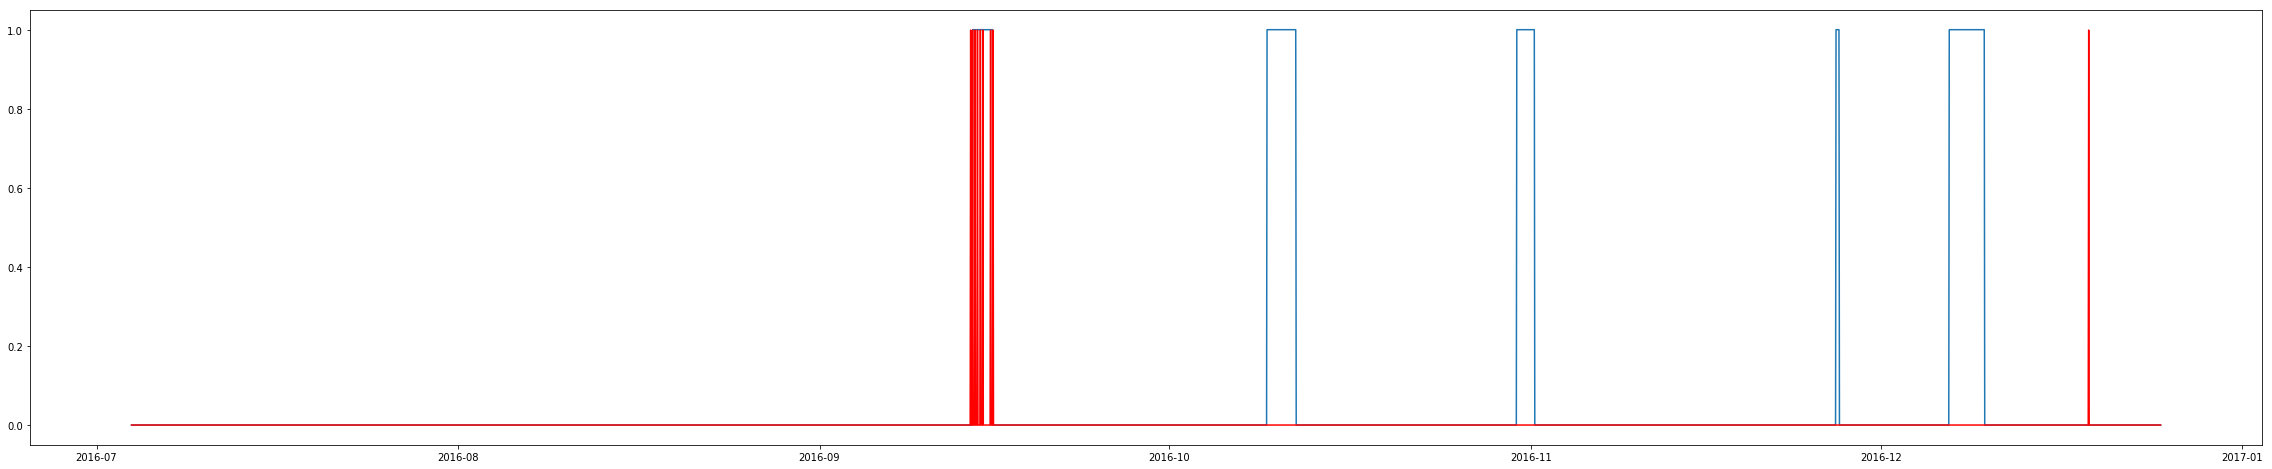

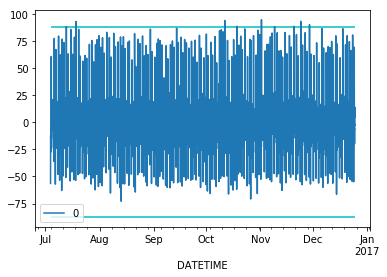

0    87.743013
Name: 0.998, dtype: float64


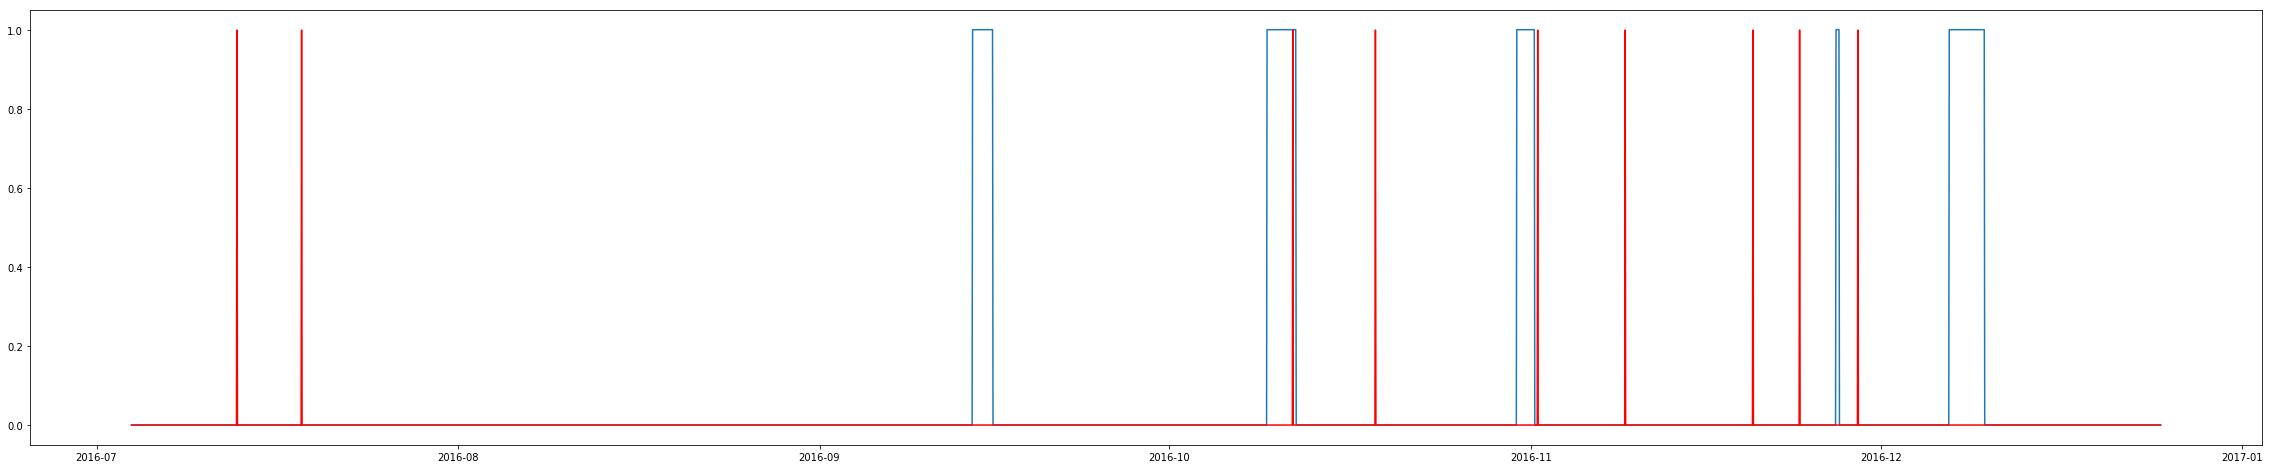

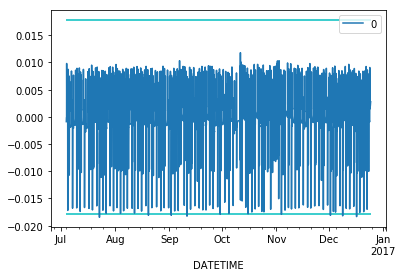

0    0.017879
Name: 0.998, dtype: float64


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


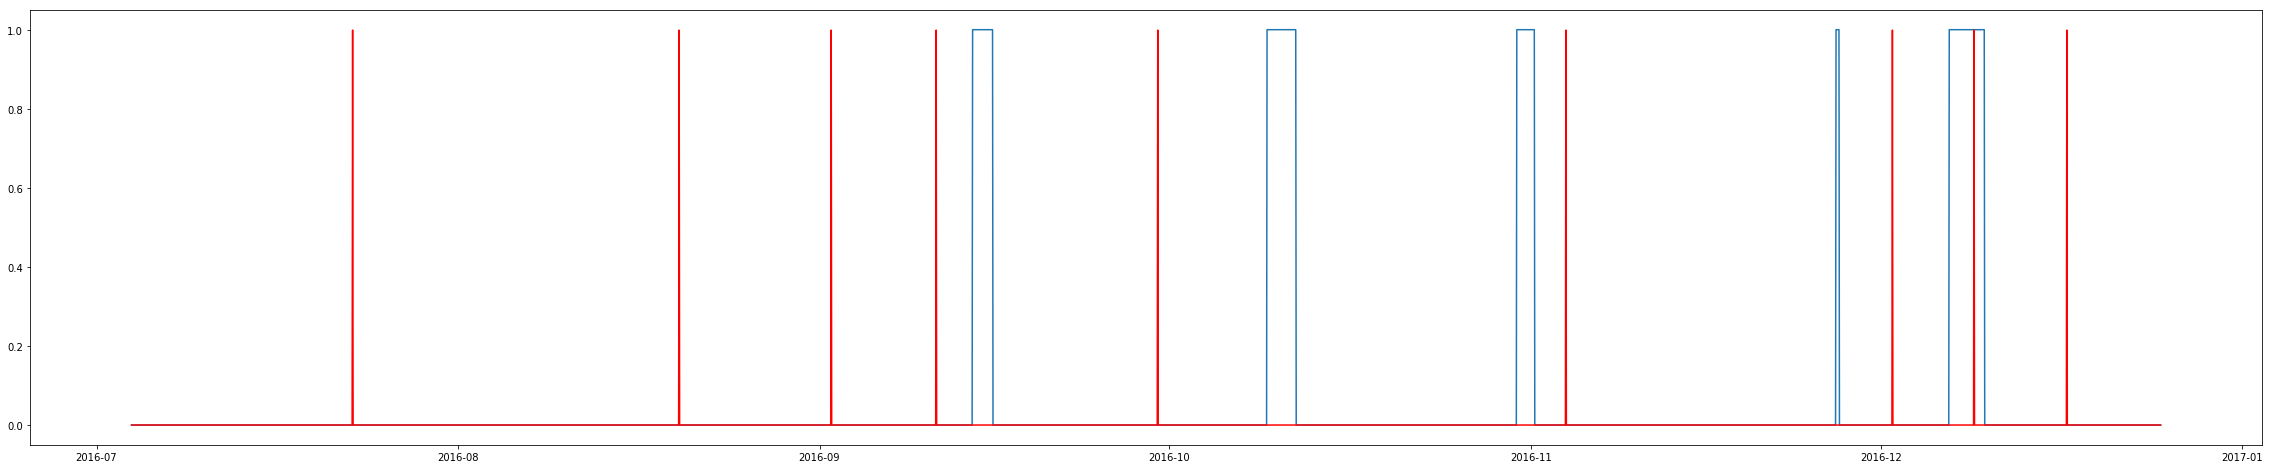

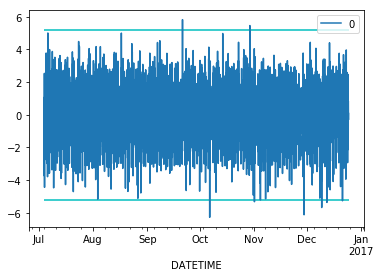

0    5.207207
Name: 0.998, dtype: float64


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


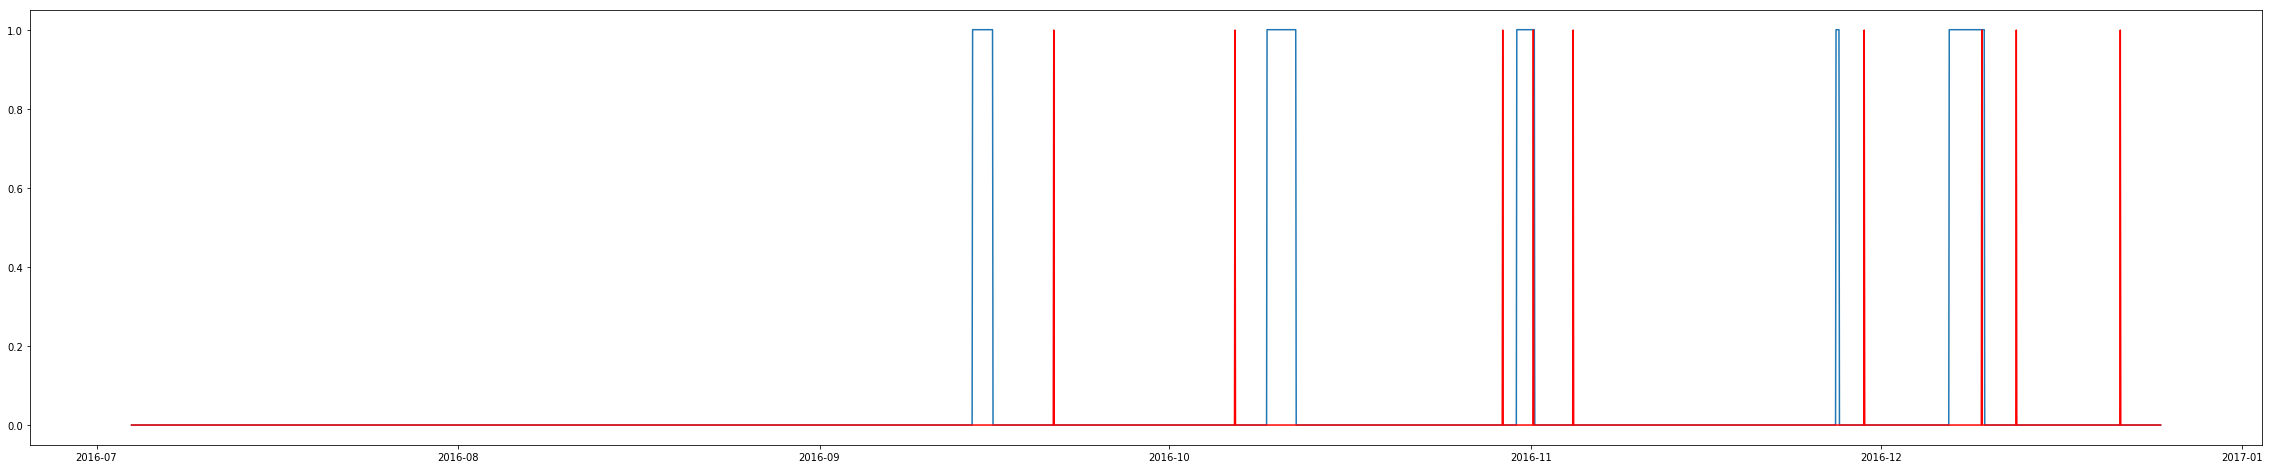

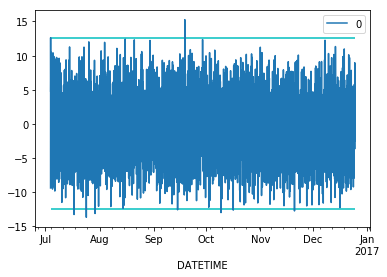

0    12.524488
Name: 0.998, dtype: float64


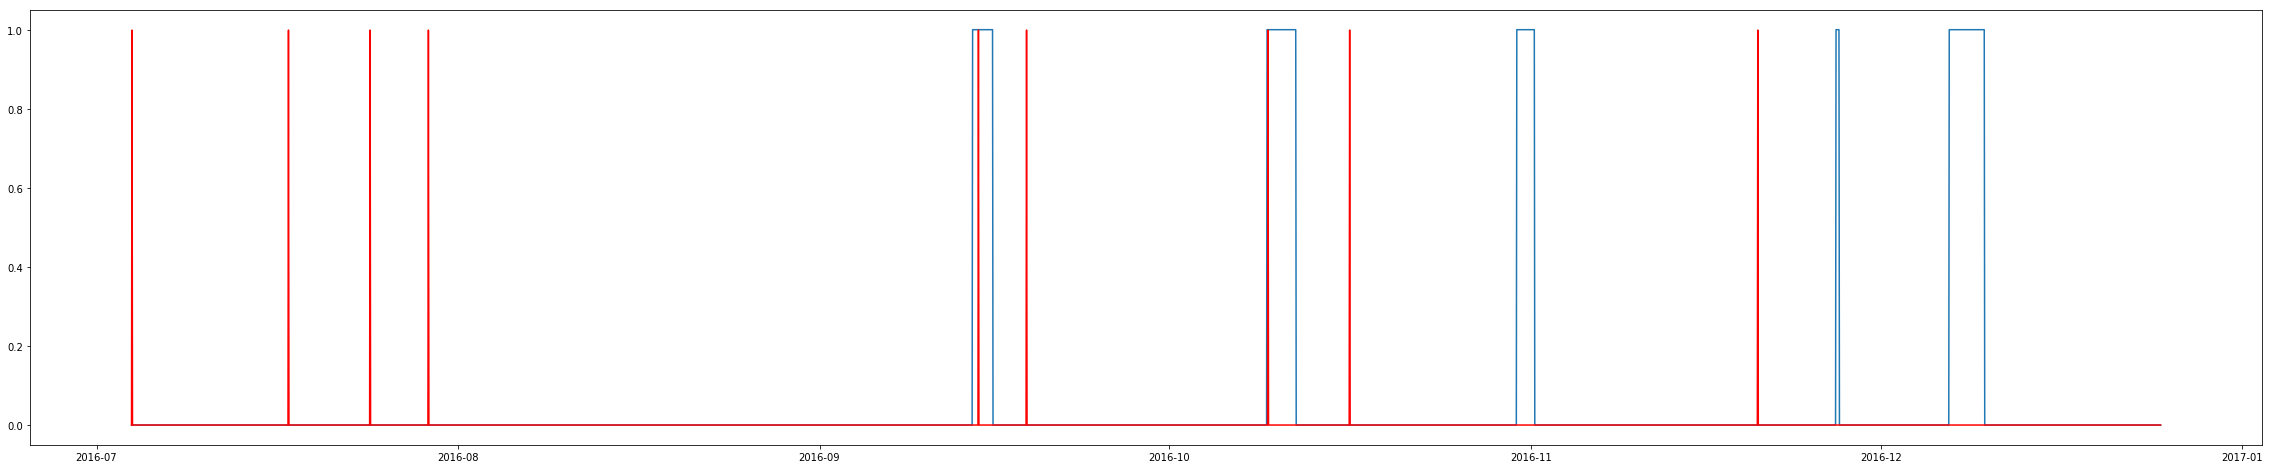

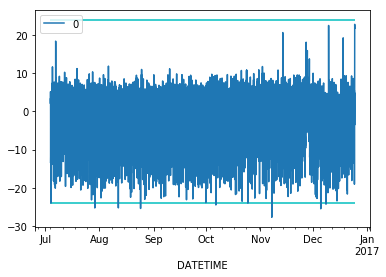

0    23.974016
Name: 0.998, dtype: float64


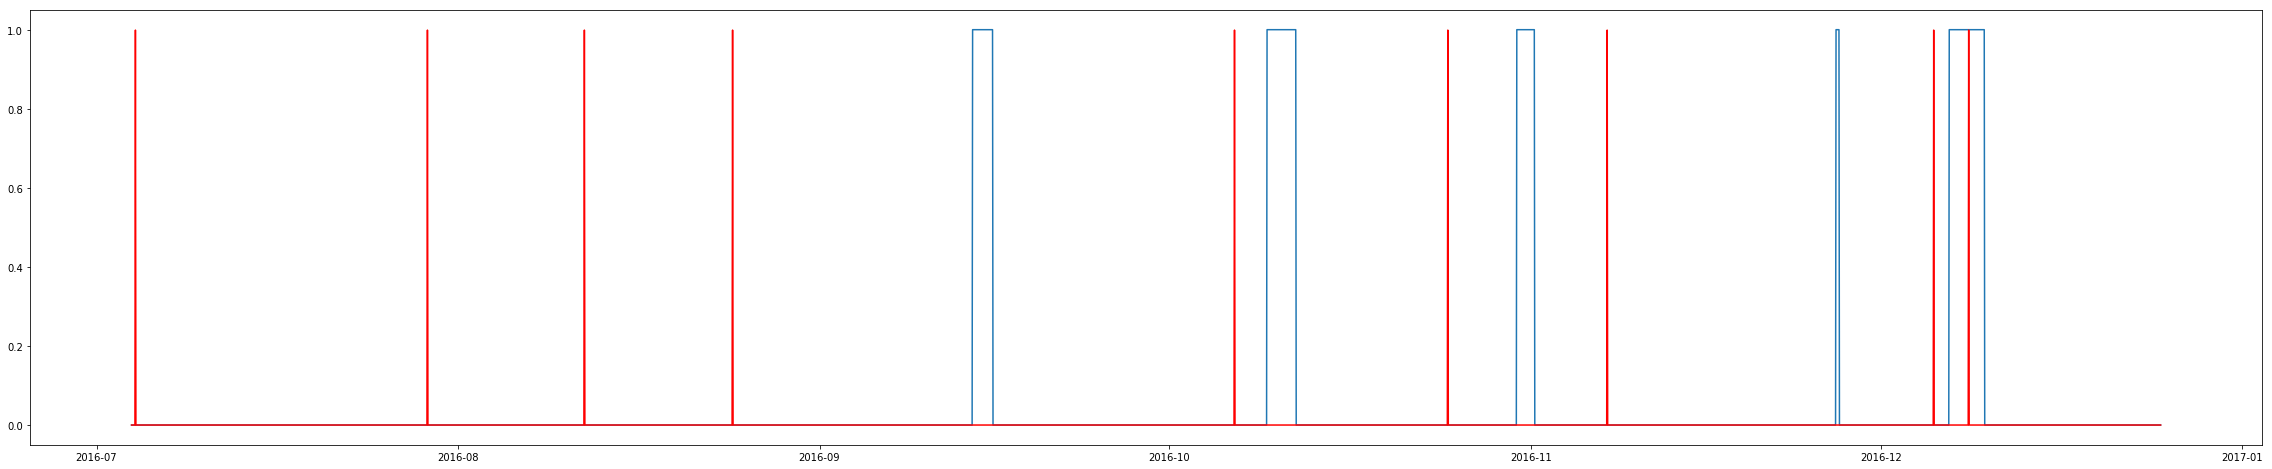

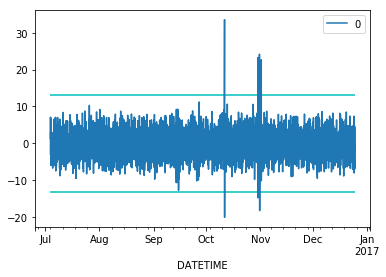

0    13.19405
Name: 0.998, dtype: float64


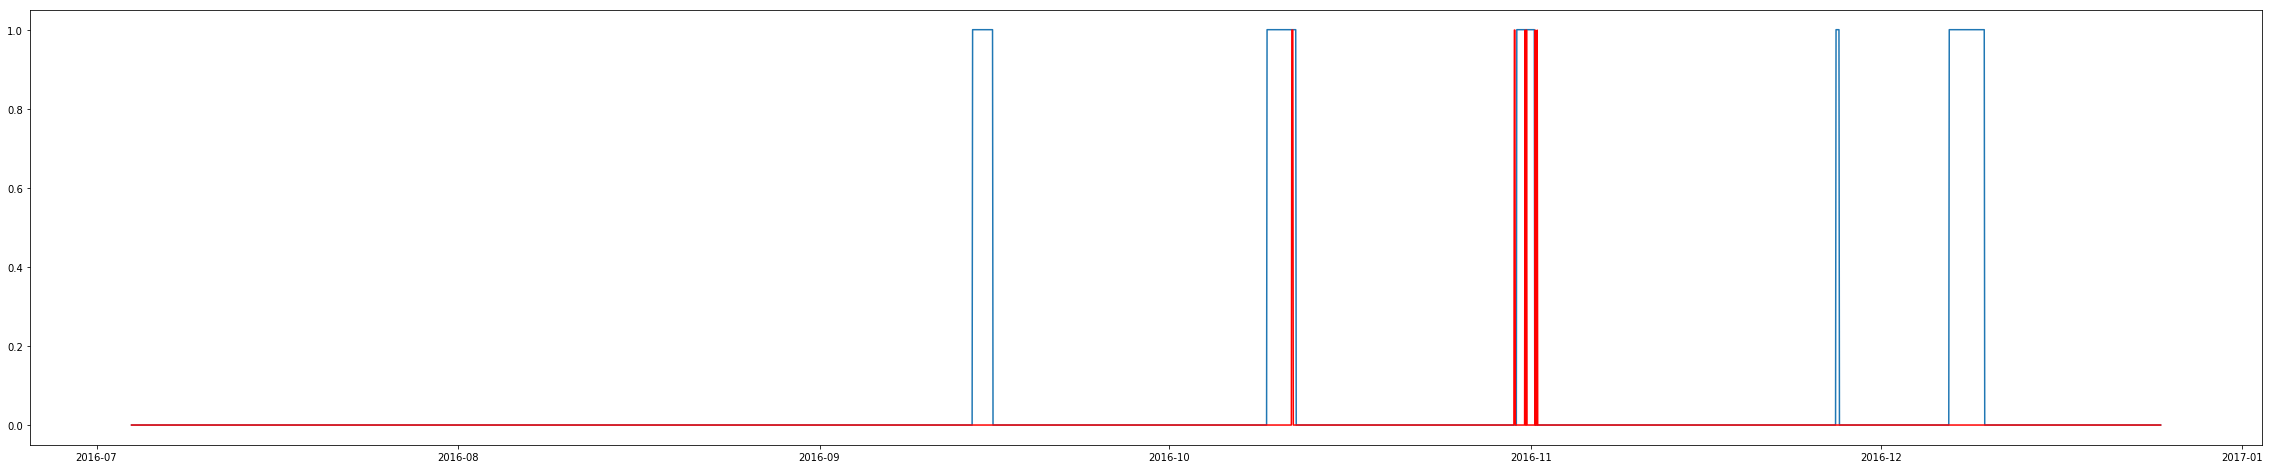

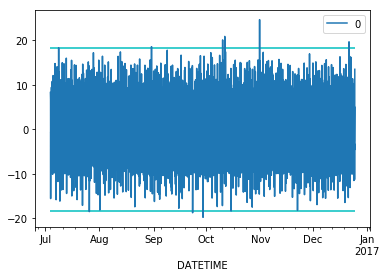

0    18.326441
Name: 0.998, dtype: float64


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


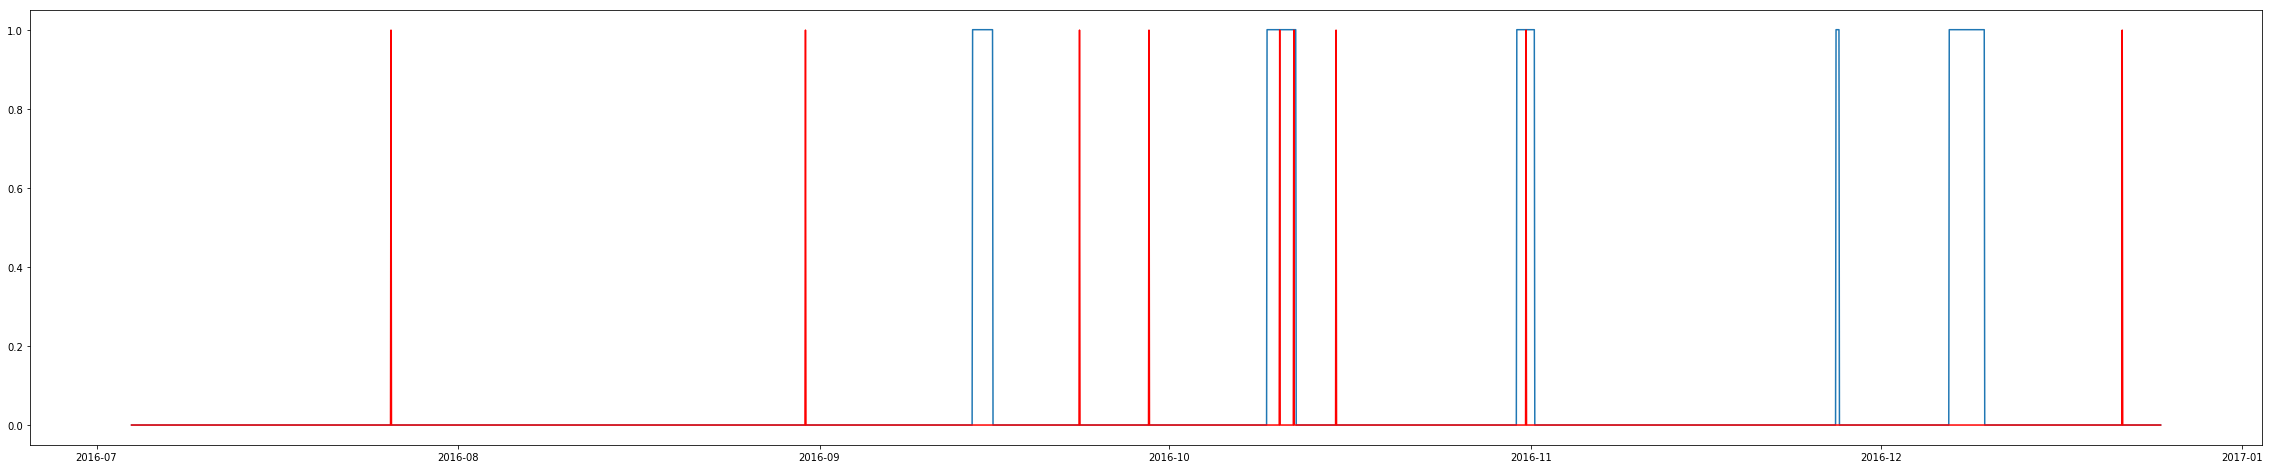

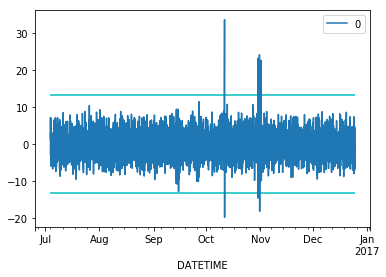

0    13.281728
Name: 0.998, dtype: float64


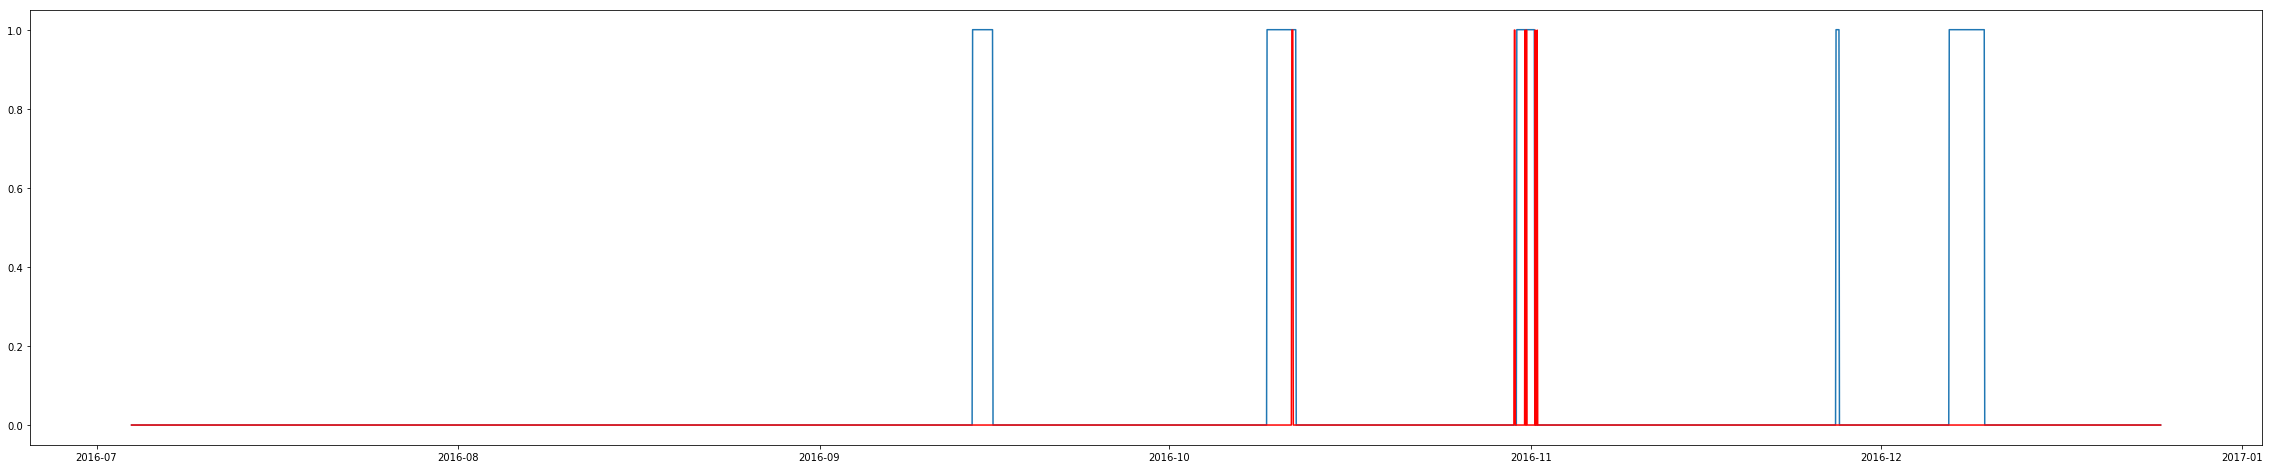

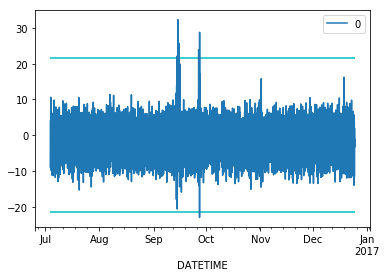

0    21.462348
Name: 0.998, dtype: float64


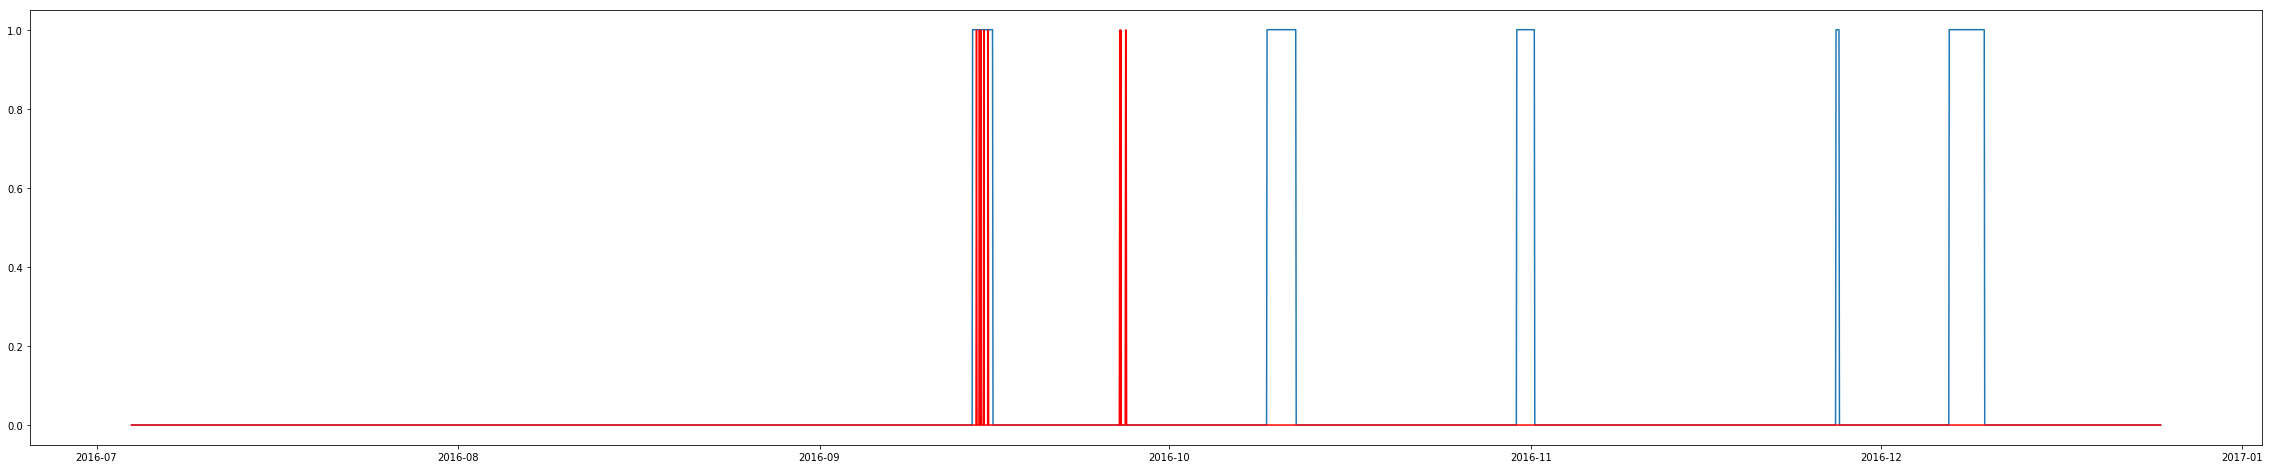

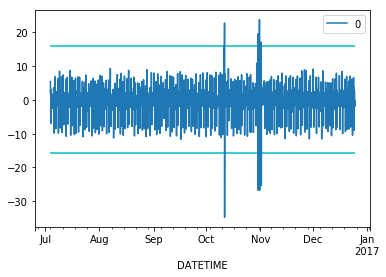

0    15.848564
Name: 0.998, dtype: float64


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


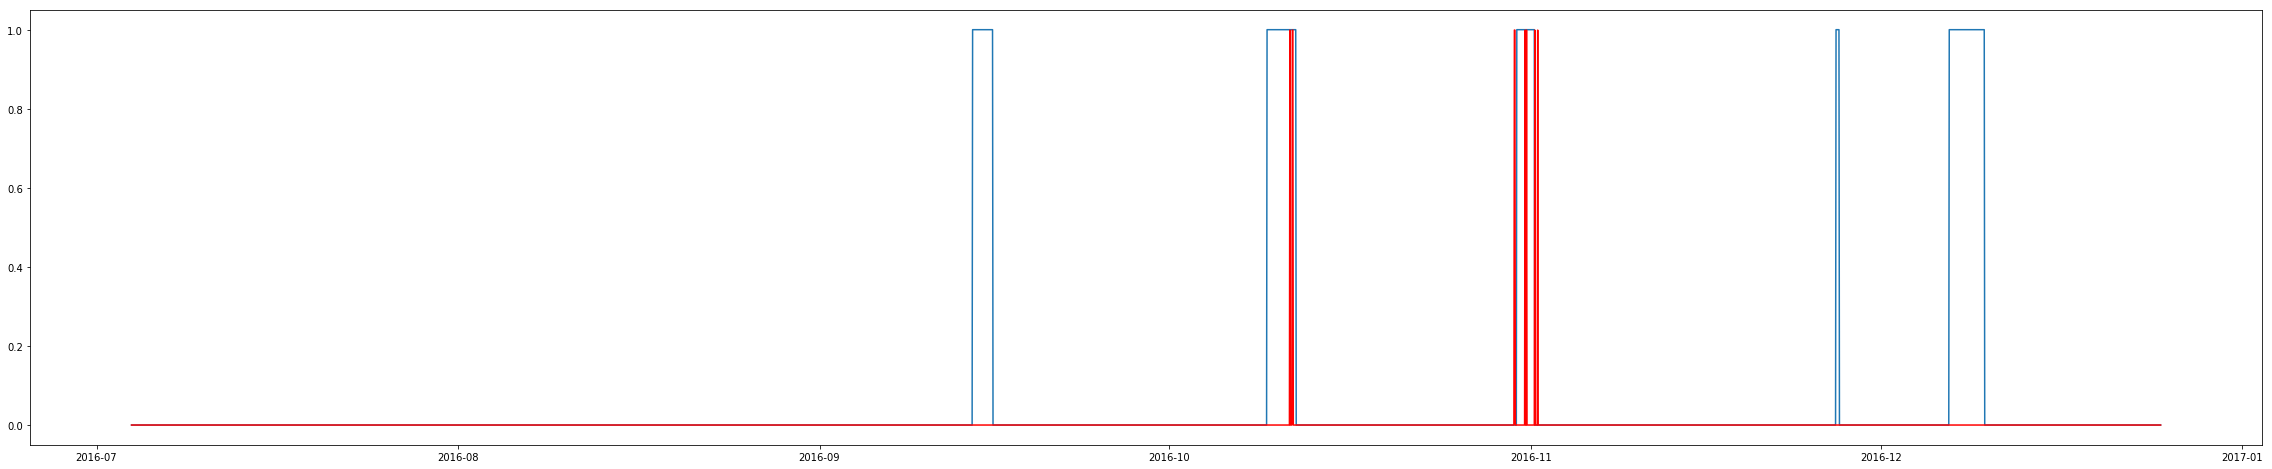

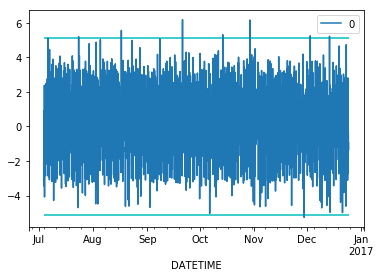

0    5.106476
Name: 0.998, dtype: float64


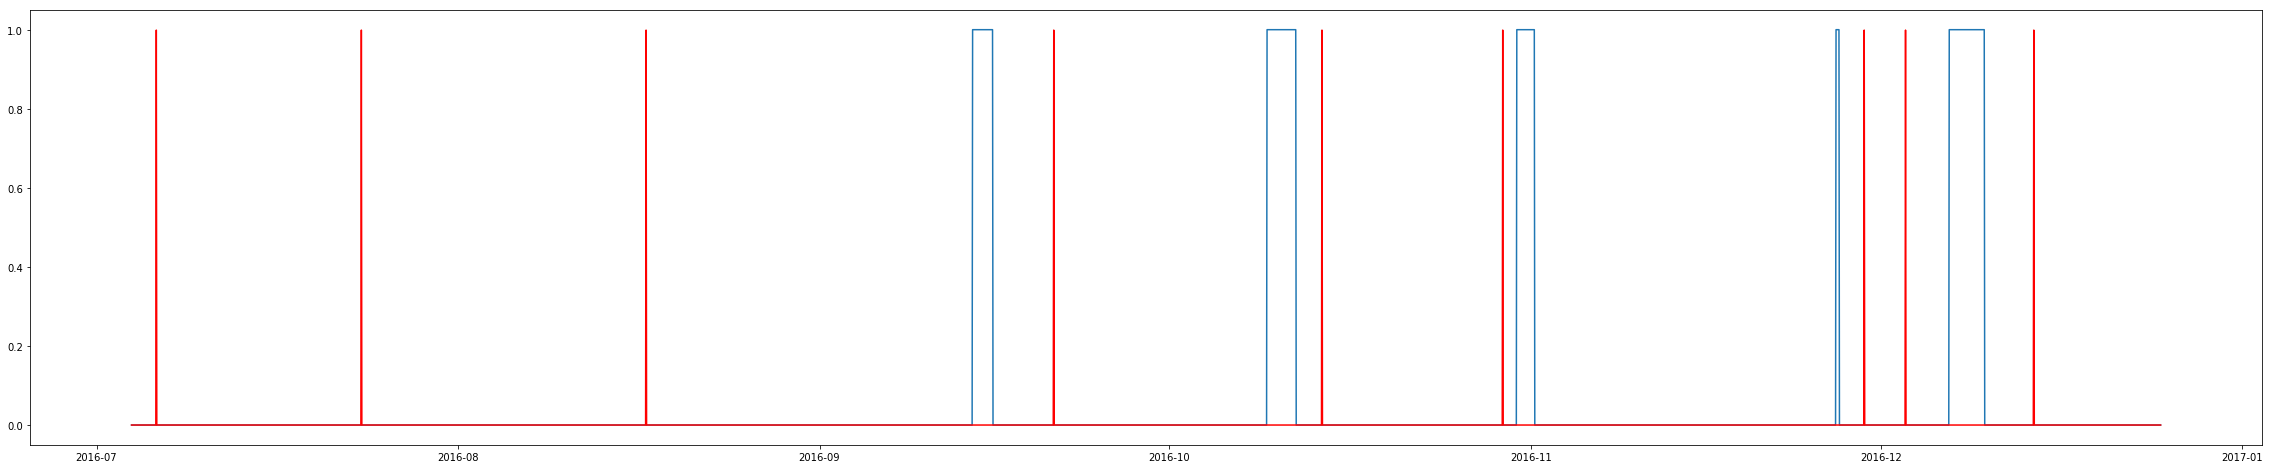

In [115]:
from pandas import DataFrame

label = data2.iloc[:,-1]
label = (label+999)/999
thres_list=[]
prediction_list = []
x = data2.index
pro = sum(label.astype(int))/len(label)
print("pro: "+str(pro))
for idx in range(len(q_list)):
    # plot residual errors
    if idx not in no_model_list:
        try:
            mod=sm.tsa.ARMA(data2.iloc[:,idx],(p_list[idx],q_list[idx])).fit(disp=0)
            residuals = DataFrame(mod.resid)
            residuals.plot()
            thres = abs(residuals).quantile(q=0.998)
            plt.hlines(thres, x[0], x[-1],colors = "c")
            plt.hlines(-thres, x[0], x[-1],colors = "c")
        #     plt.savefig('d1_resi.png', dpi=300, bbox_inches='tight')
            plt.show()
            # residuals.plot(kind='kde')

            print(thres)
            thres_list.append(thres[0])

            plt.figure(figsize=(40,8))
            plt.plot(label)
            prediction=(abs(residuals)>thres[0])*1
            plt.plot(prediction, color='red')
        #     plt.savefig('d1_label.png', dpi=300, bbox_inches='tight')
            prediction_list.append(prediction)
        except:
            prediction_list.append([])
            thres_list.append([])
    else:
        prediction_list.append([])
        thres_list.append([])

In [116]:
from sklearn.metrics import confusion_matrix
#  true negatives  false positives
#  false negatives  true positives

recall=[]
precision=[]
for i in range(len(q_list)):
    if thres_list[i] == []:
        precision.append(0)
        recall.append(0)
    else:
        cm=confusion_matrix(prediction_list[i].astype(int),label.astype(int))
        recall.append(cm[1][1]/(cm[0][1]+cm[1][1]))
        precision.append(cm[1][1]/(cm[1][0]+cm[1][1]))
        

recall_max = np.argmax(recall)
precision_max = np.argmax(precision)

print(recall)
print(precision)

[0.0136986301369863, 0.0, 0.0045662100456621, 0.0, 0.0045662100456621, 0.0045662100456621, 0.0, 0, 0, 0.0091324200913242, 0, 0, 0, 0.0, 0, 0, 0, 0.0228310502283105, 0, 0.0, 0, 0.0045662100456621, 0, 0, 0, 0.0136986301369863, 0, 0.0273972602739726, 0, 0.0045662100456621, 0, 0.0045662100456621, 0, 0.0091324200913242, 0.0091324200913242, 0, 0.0045662100456621, 0.0228310502283105, 0.0136986301369863, 0.0228310502283105, 0.0228310502283105, 0.0228310502283105, 0.0]
[0.3333333333333333, 0.0, 0.1111111111111111, 0.0, 0.1111111111111111, 0.1111111111111111, 0.0, 0, 0, 0.2222222222222222, 0, 0, 0, 0.0, 0, 0, 0, 0.5555555555555556, 0, 0.0, 0, 0.1111111111111111, 0, 0, 0, 0.3333333333333333, 0, 0.6666666666666666, 0, 0.1111111111111111, 0, 0.1111111111111111, 0, 0.2222222222222222, 0.2222222222222222, 0, 0.1111111111111111, 0.5555555555555556, 0.3333333333333333, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.0]


/Users/lizy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


In [117]:
train_sensors=[]
for i, item in enumerate(precision):
    if item > 0:
        train_sensors.append(test.columns[i])

print(train_sensors)

['L_T1', 'L_T3', 'L_T5', 'L_T6', 'F_PU2', 'F_PU6', 'F_PU8', 'F_PU10', 'F_PU11', 'F_V2', 'P_J280', 'P_J300', 'P_J256', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14']


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


0.9359580070979748


/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


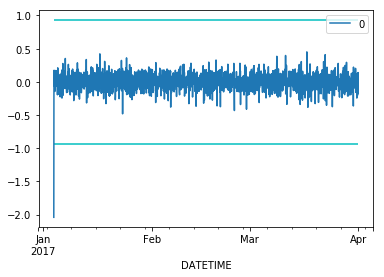

/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.4627914506671429


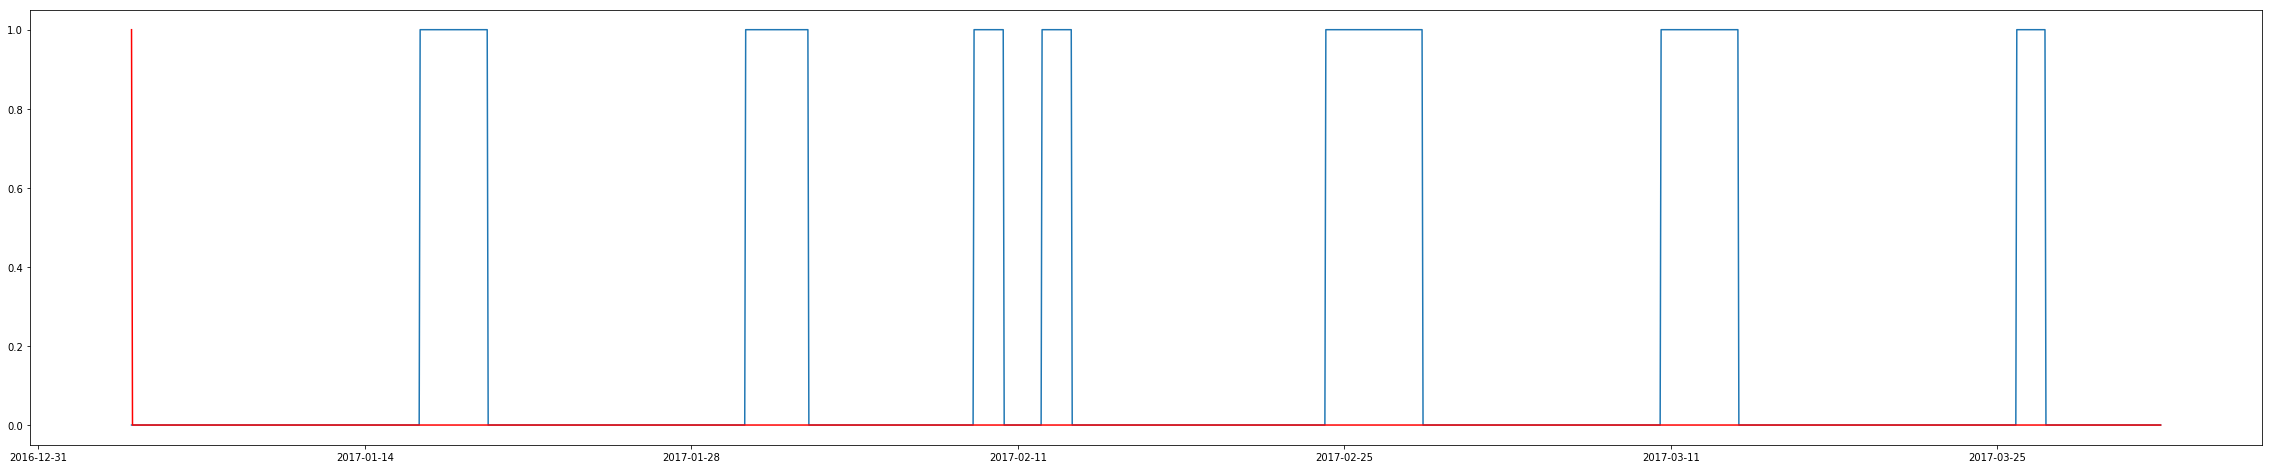

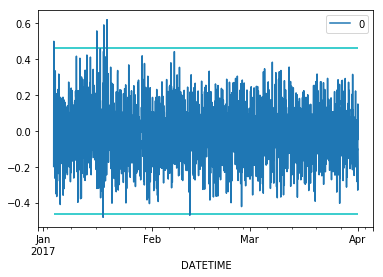

0.6696189899465325


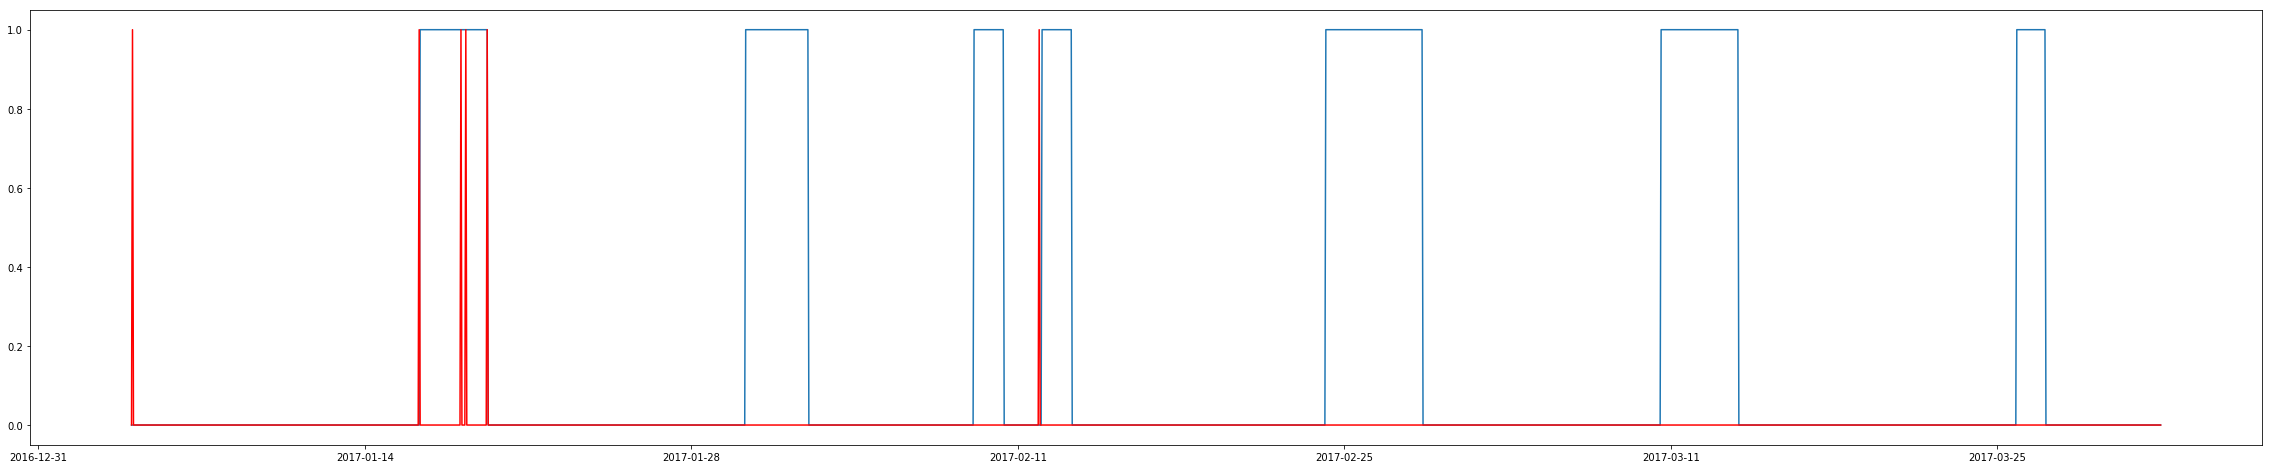

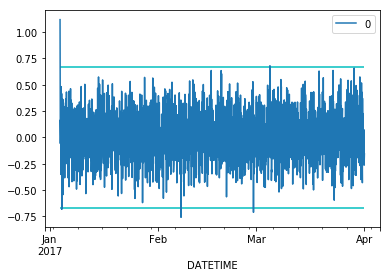

/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.38435903184987896


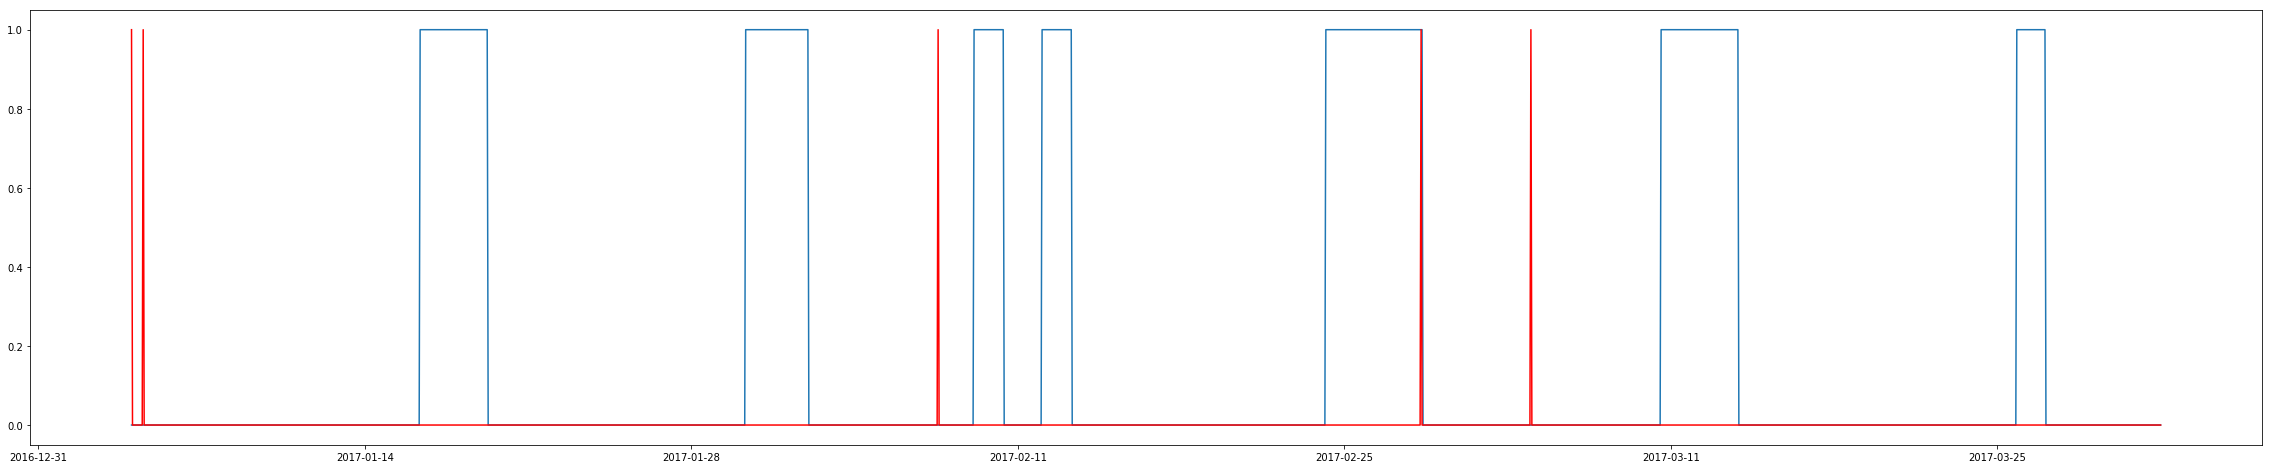

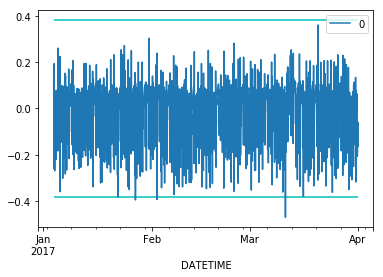

87.53529972300295


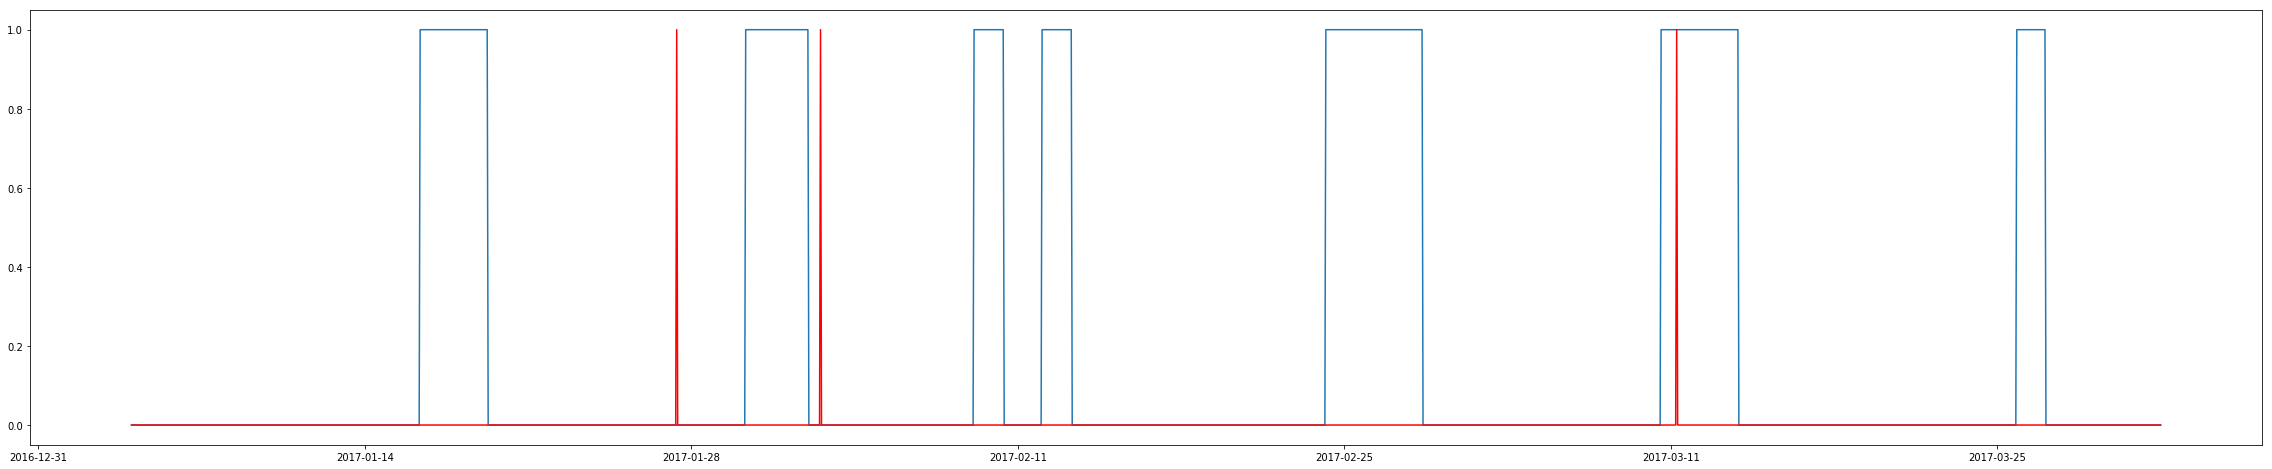

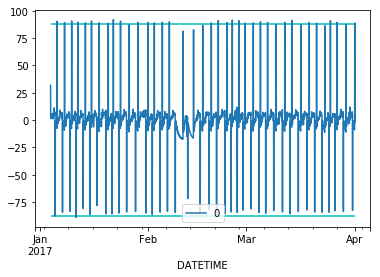

43.233368932502856


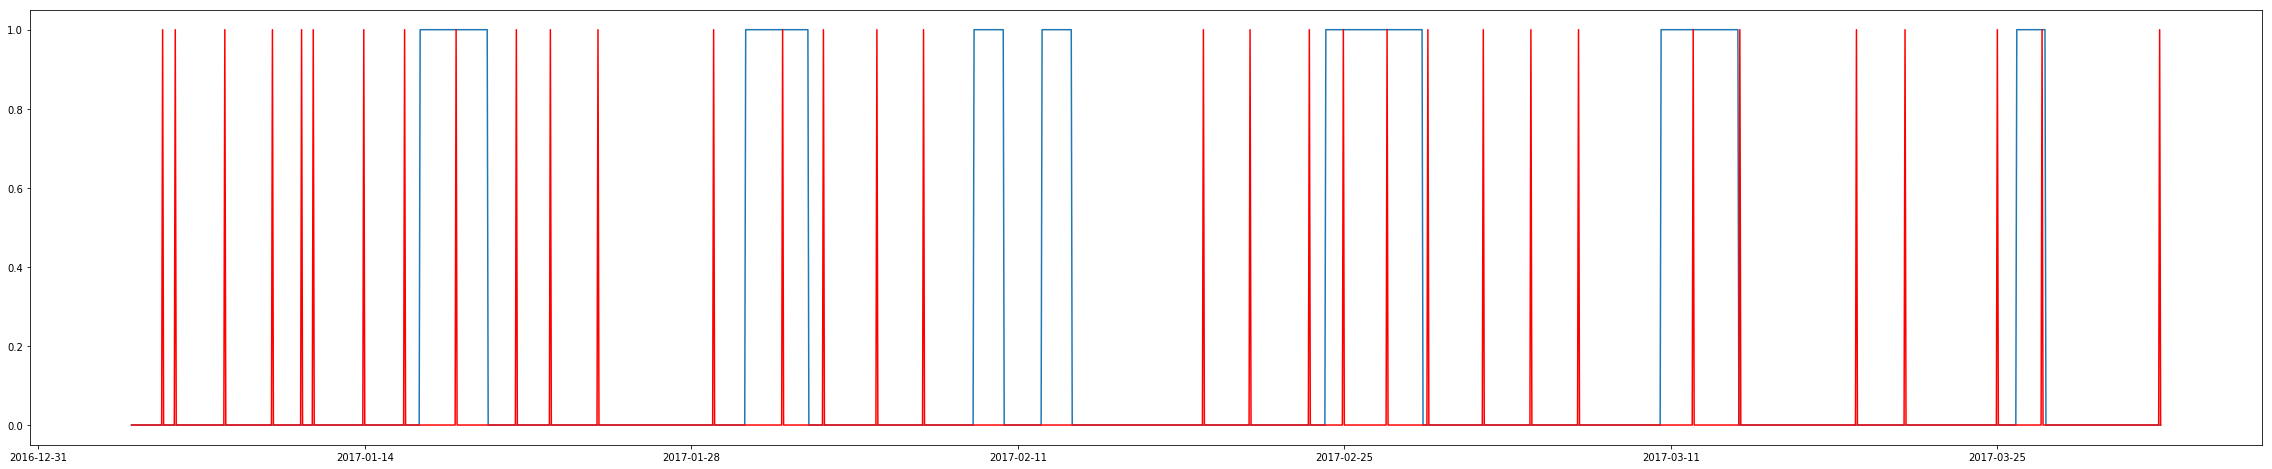

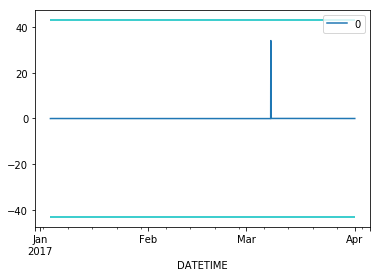

30.77288340729058


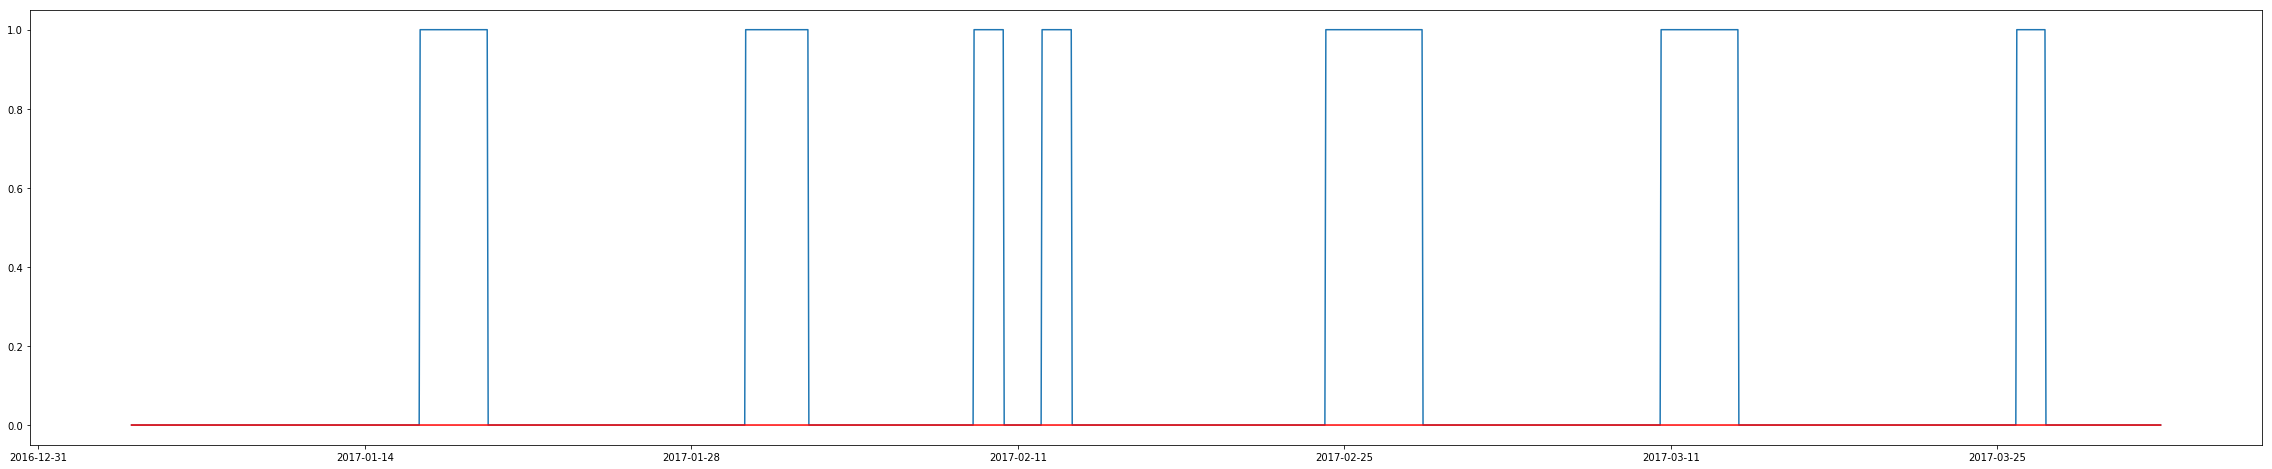

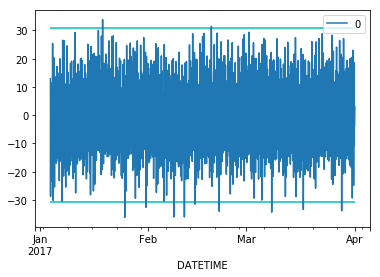

/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


29.847019457424686


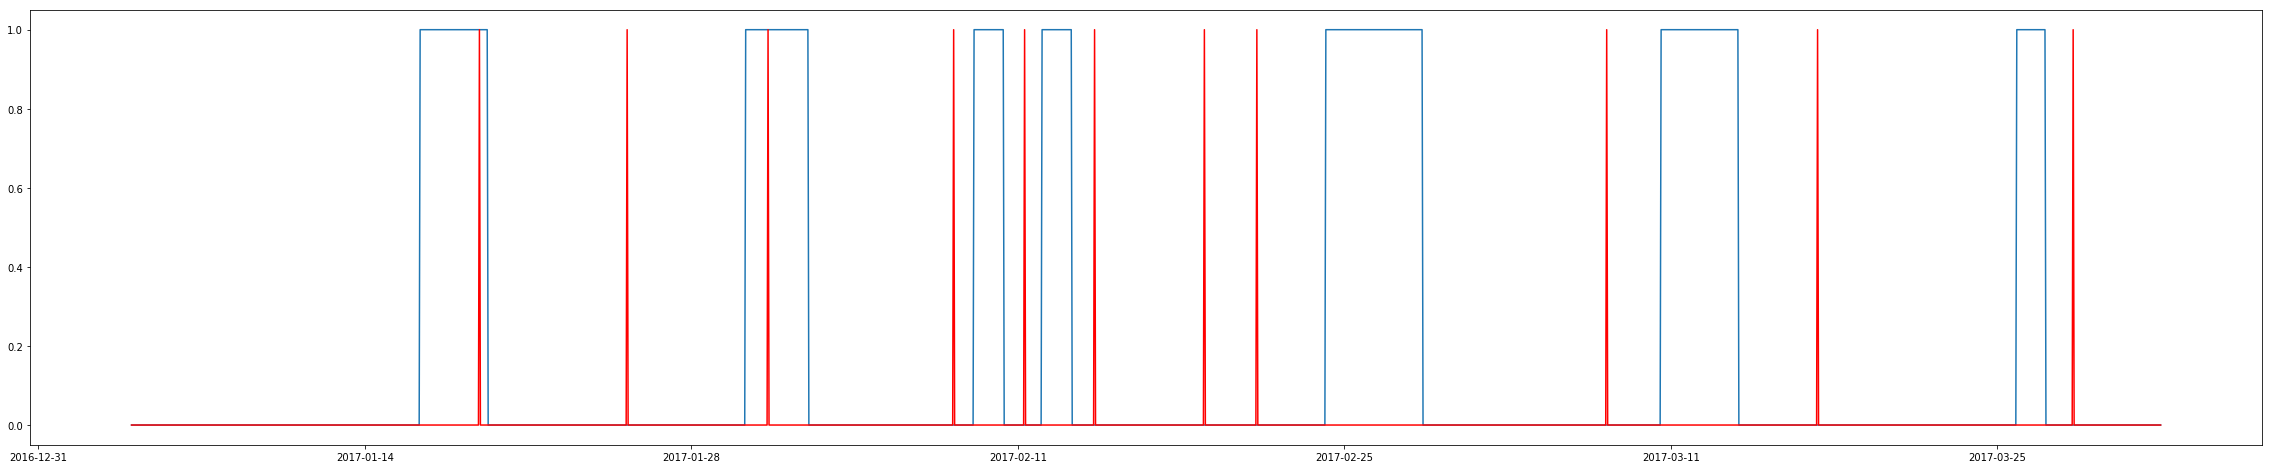

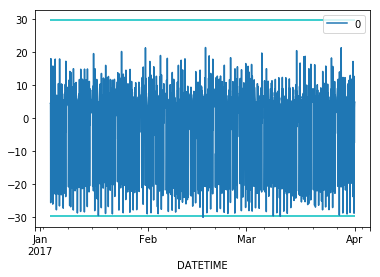

87.74301334760912


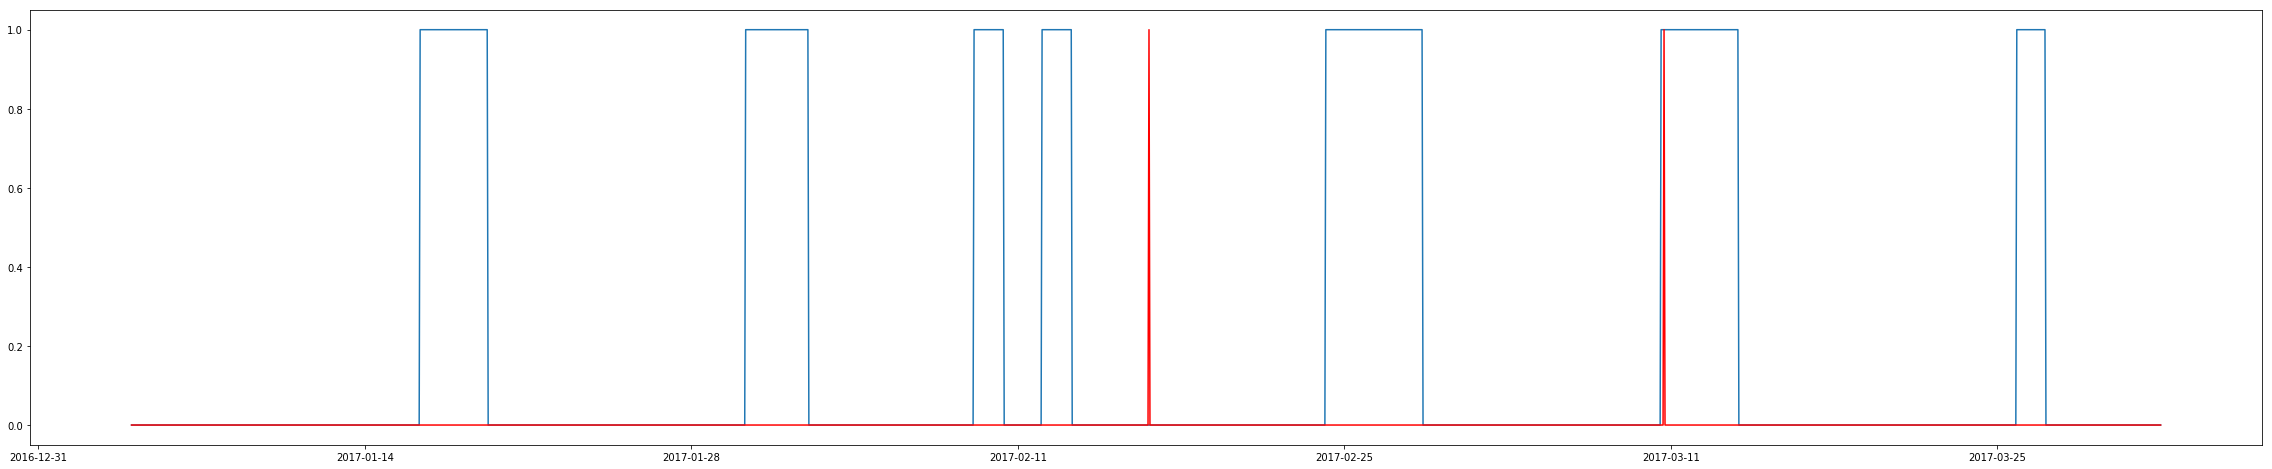

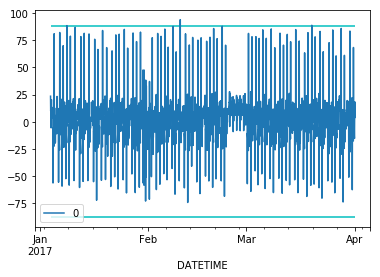

/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.017878811537693072


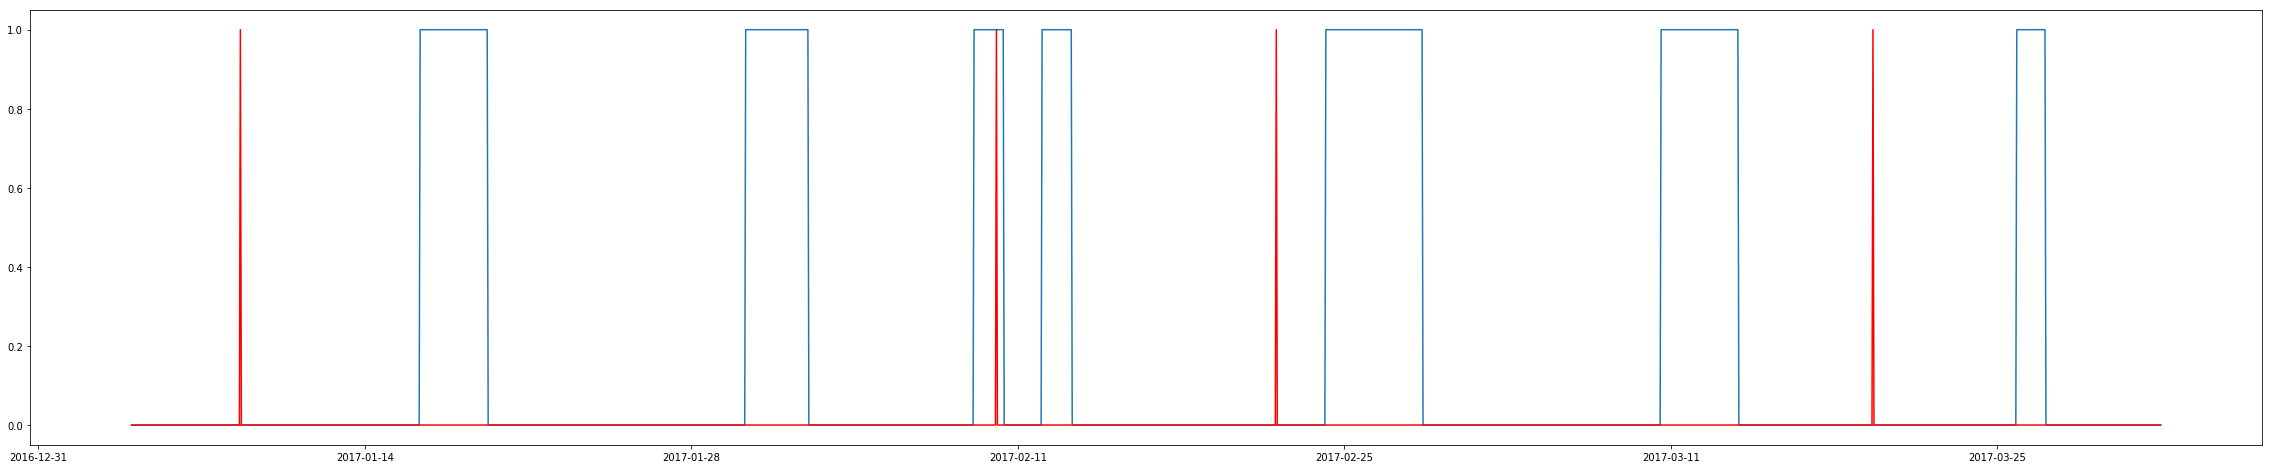

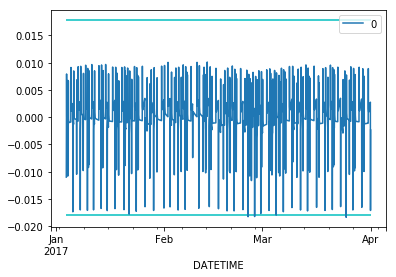

/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5.207207002604886


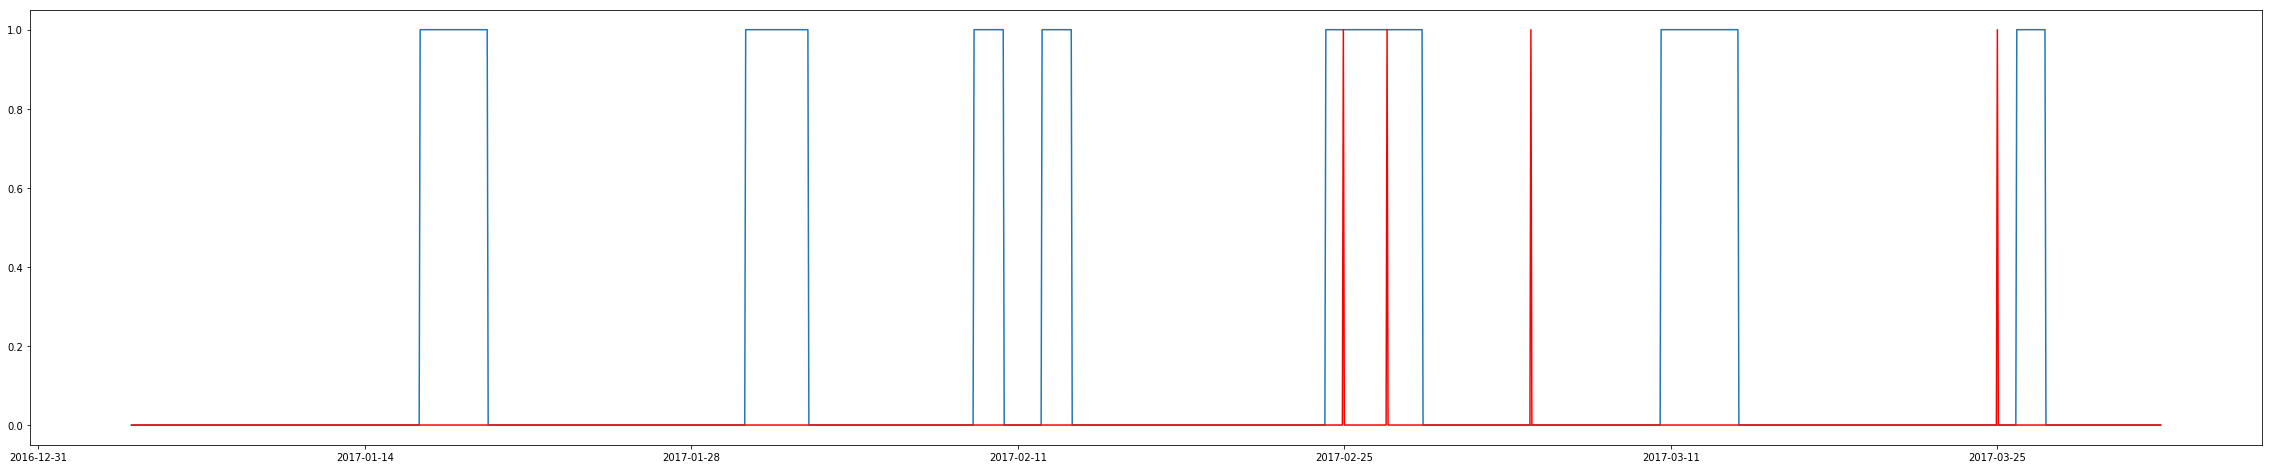

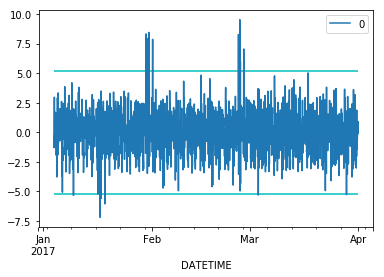

/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


12.52448776352325


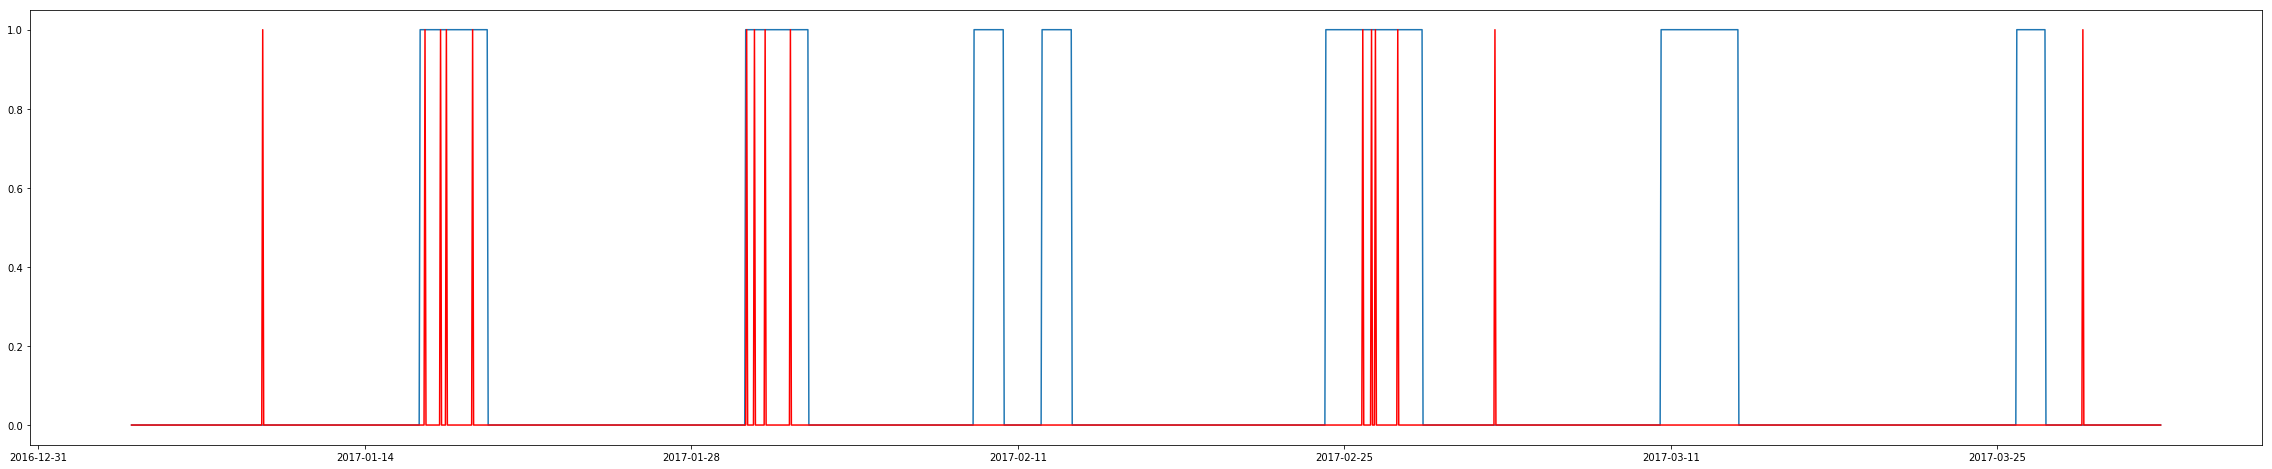

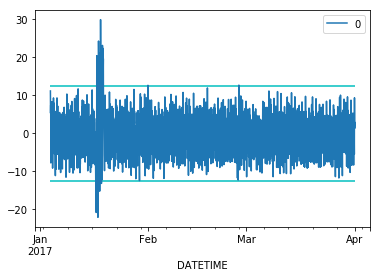

/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


18.326440929116796


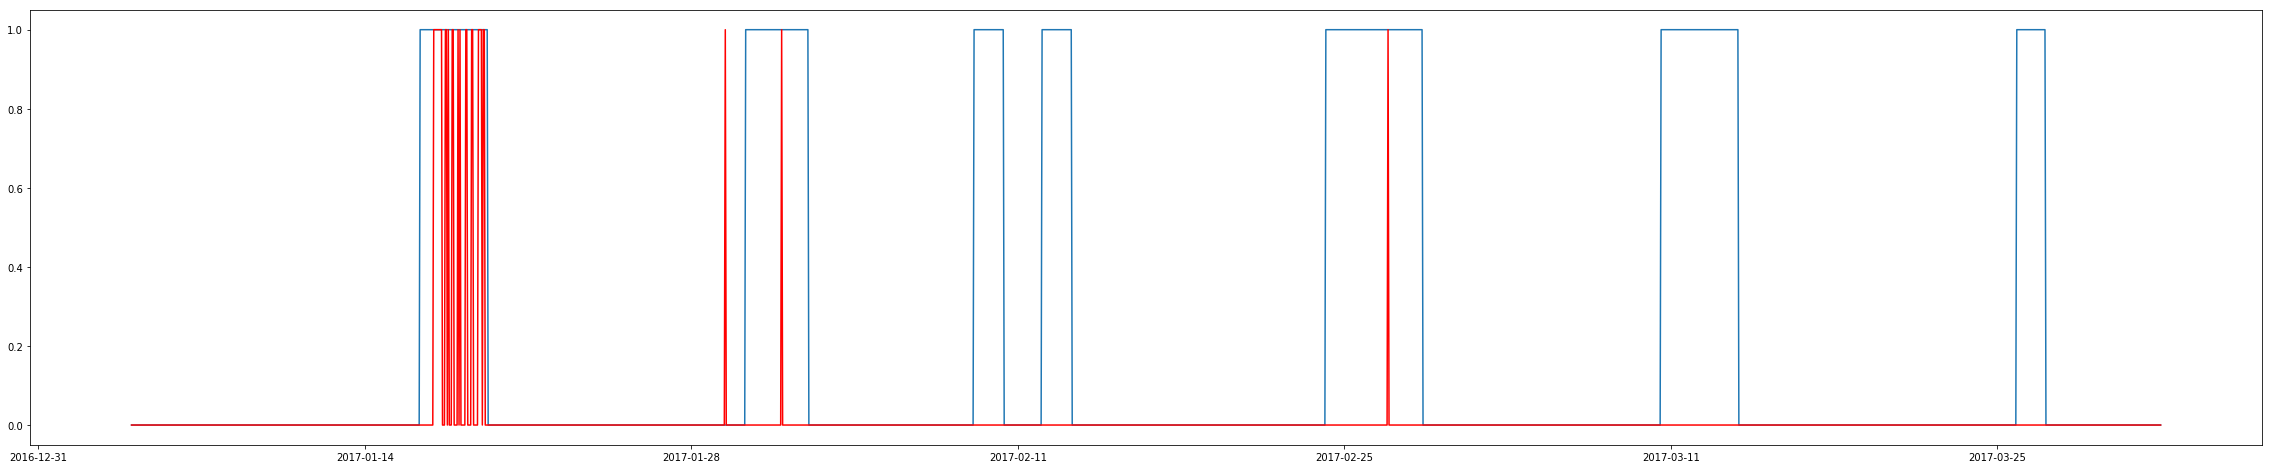

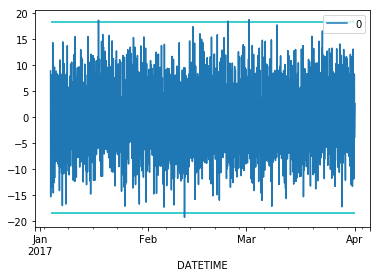

/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


13.281727816884768


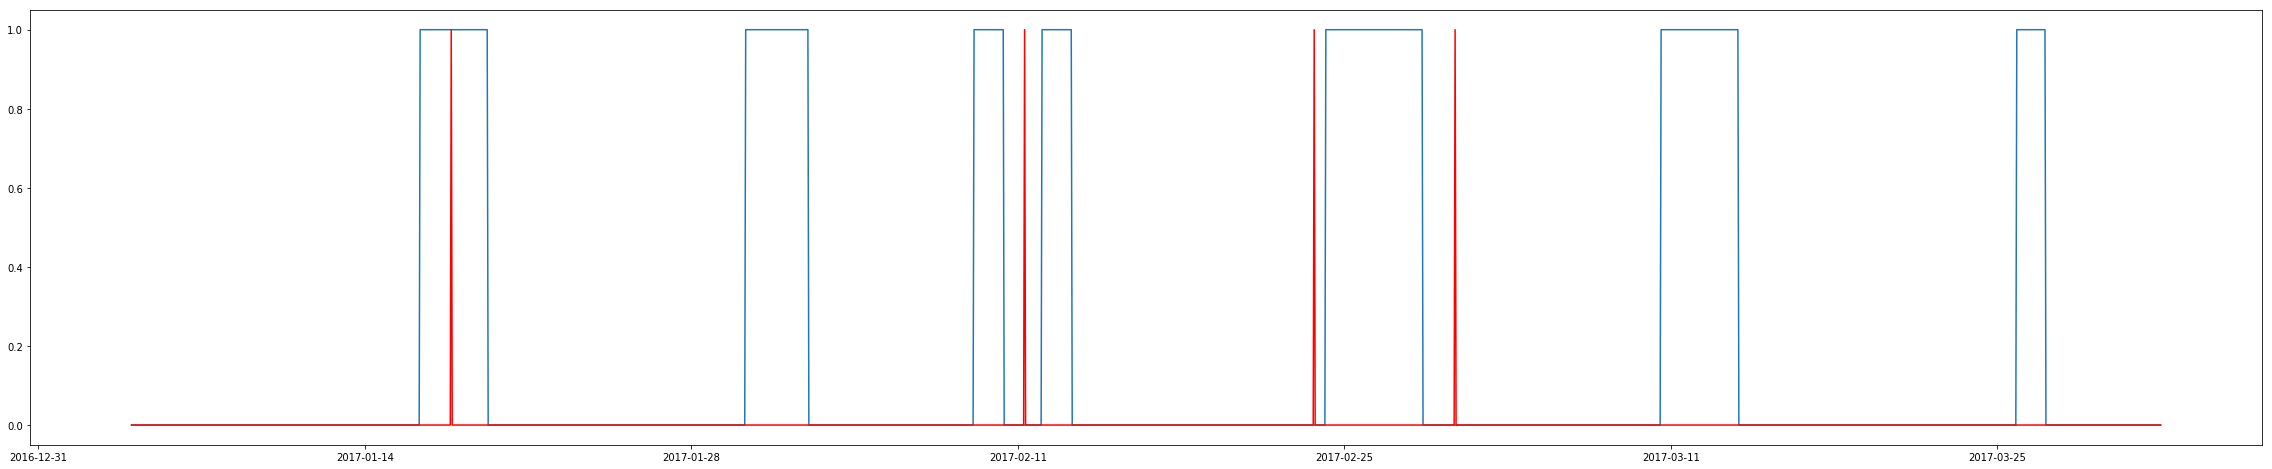

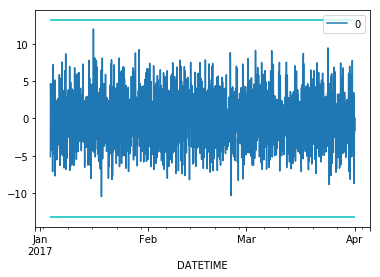

/Users/lizy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


21.46234790897129


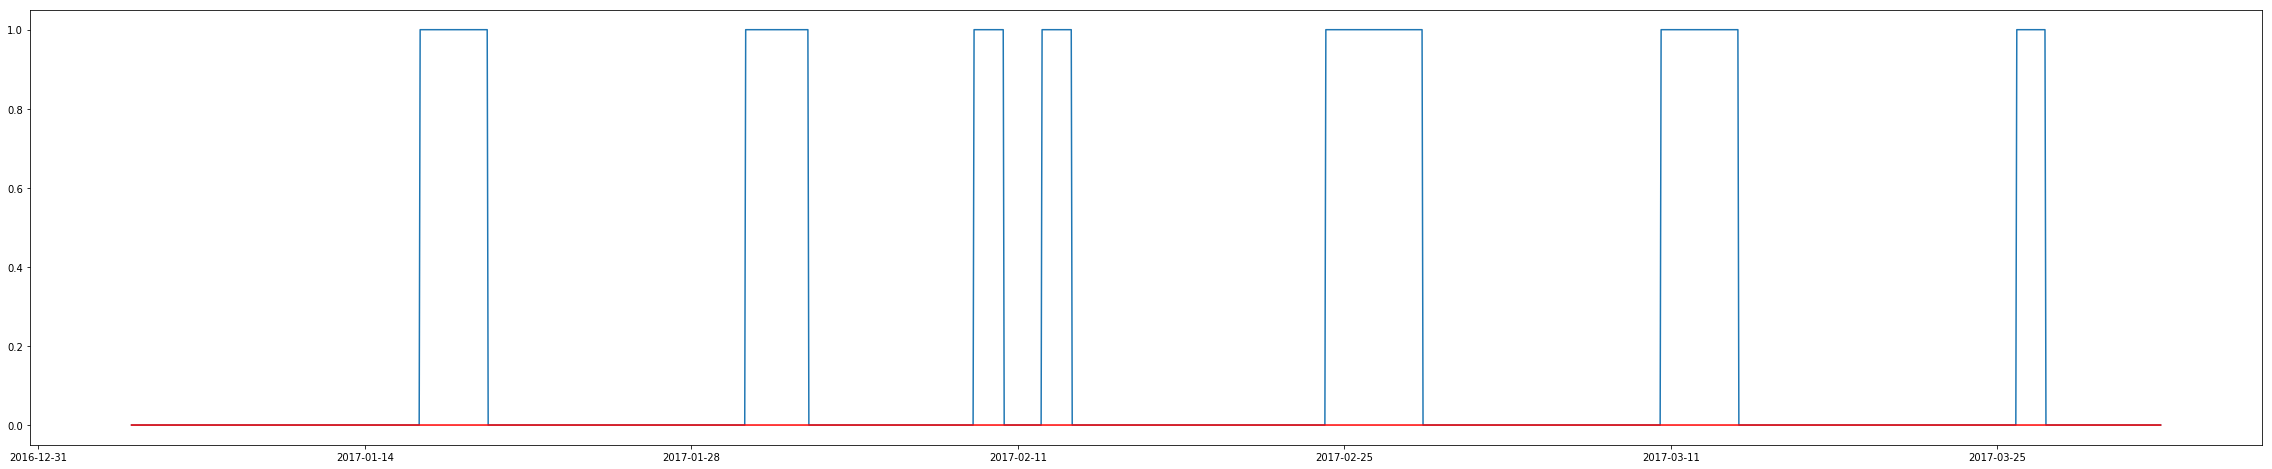

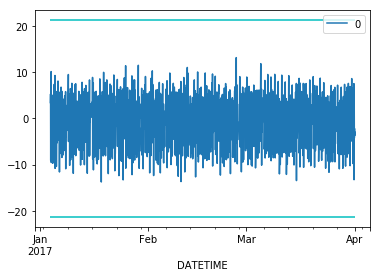

15.84856359813715


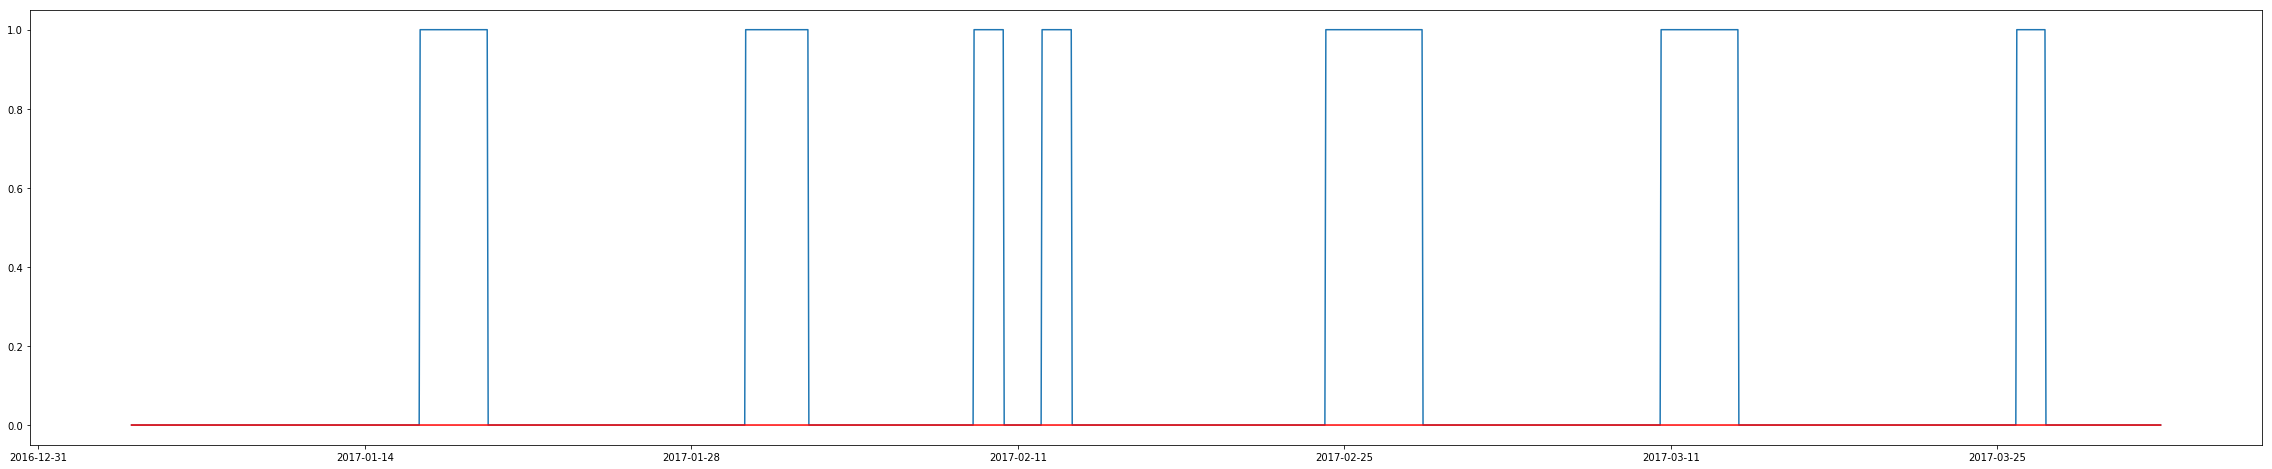

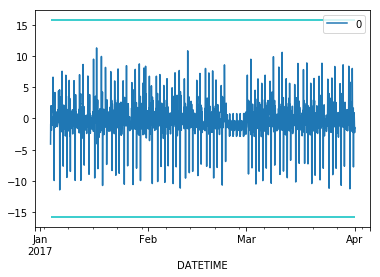

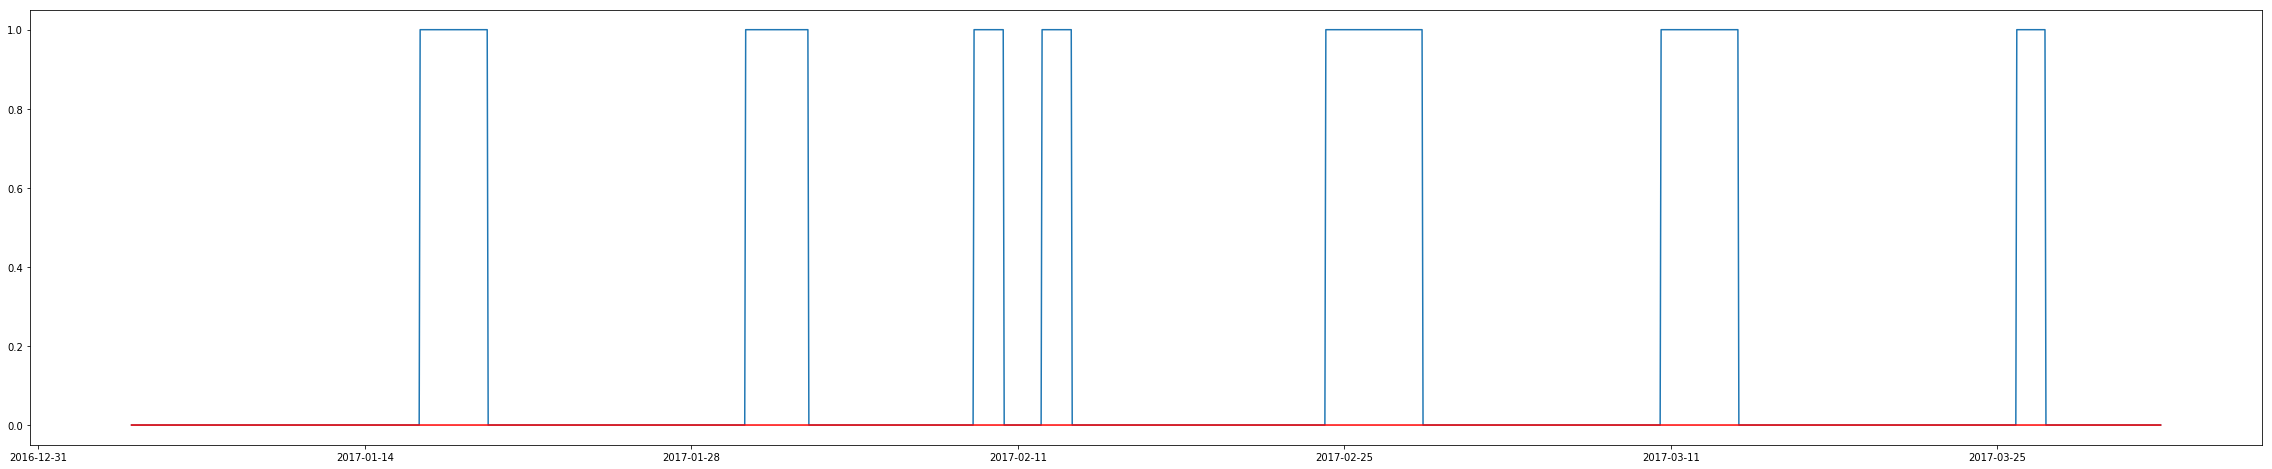

In [118]:

test_labeled = read_csv('../data/labeled_test_data.csv',sep='\t')

test = read_csv('../data/BATADAL_test_dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)

from pandas import DataFrame
test_label = test_labeled['label']
prediction_test = []
x = test.index
index = []
for idx in range(len(q_list)):
    # plot residual errors
    if precision[idx] !=0.0:
        try:
            mod=sm.tsa.ARMA(test.iloc[:,idx],(p_list[idx],q_list[idx])).fit(disp=0)
            residuals = DataFrame(mod.resid)
            residuals.plot()
            thres = thres_list[idx]
            print(thres)
            plt.hlines(thres, x[0], x[-1],colors = "c")
            plt.hlines(-thres, x[0], x[-1],colors = "c")
            plt.show()
            # residuals.plot(kind='kde')

            plt.figure(figsize=(40,8))
            plt.plot(x,test_label)
            prediction=(abs(residuals)>thres)*1
            plt.plot(prediction, color='red')

            prediction_test.append(prediction)
        except:
            prediction_test.append([0])
            index.append(idx)
            pass
    else:
        prediction_test.append([0])
        index.append(idx)

In [119]:
from sklearn.metrics import confusion_matrix
#  true negatives  false positives
#  false negatives  true positives

recall_test=[]
precision_test=[]
for i in range(len(prediction_test)):
    if len(prediction_test[i]) != 1:
        cm=confusion_matrix(prediction_test[i].astype(int),test_label.astype(int))
        recall_test.append(cm[1][1]/(cm[0][1]+cm[1][1]))
        precision_test.append(cm[1][1]/(cm[1][0]+cm[1][1]))
    else:
        precision_test.append(0)
        recall_test.append(0)

recall_max = np.argmax(recall_test)
precision_max = np.argmax(precision_test)

print(recall_test)
print(precision_test)

[0.0, 0, 0.007371007371007371, 0, 0.002457002457002457, 0.002457002457002457, 0, 0, 0, 0.014742014742014743, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0.004914004914004914, 0, 0, 0, 0.002457002457002457, 0, 0, 0, 0.002457002457002457, 0, 0.004914004914004914, 0, 0.029484029484029485, 0.0687960687960688, 0, 0, 0, 0.002457002457002457, 0.0, 0.0, 0.0, 0]
[0.0, 0, 0.5, 0, 0.2, 0.3333333333333333, 0, 0, 0, 0.18181818181818182, 0, 0, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0.18181818181818182, 0, 0, 0, 0.5, 0, 0, 0, 0.25, 0, 0.5, 0, 0.8, 0.9655172413793104, 0, 0, 0, 0.25, nan, nan, nan, 0]


/Users/lizy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


In [128]:
available_sensors=[]
for i, item in enumerate(precision_test):
    if item > 0.5:
        available_sensors.append(test.columns[i])
print(available_sensors)

['P_J300', 'P_J256']


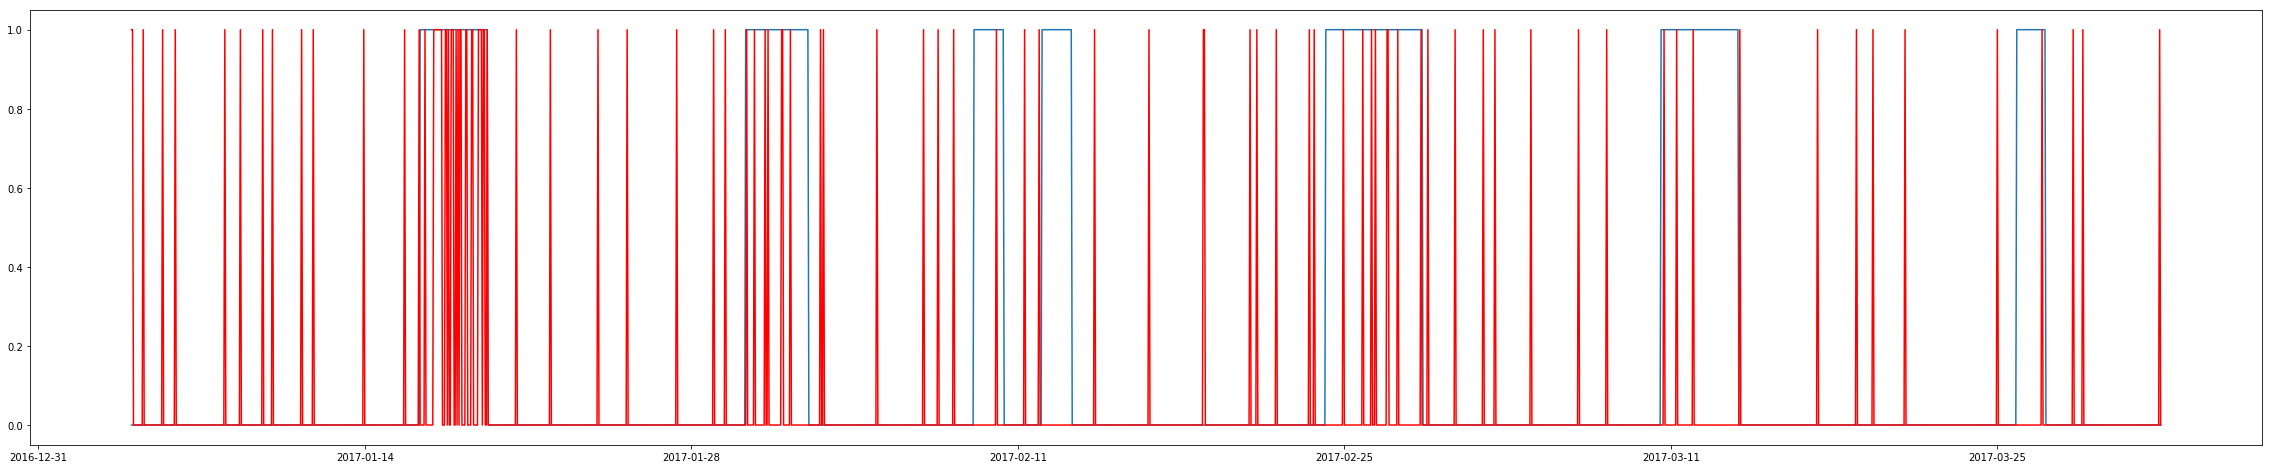

In [126]:
predic = np.zeros(len(test))
for i in range(len(prediction_test)): 
    if (test.columns[i] in train_sensors) and (len(prediction_test[i]) != 1):
        #print(test.columns[i])
        predic = predic + prediction_test[i].astype(int).T

prediction_t =((predic!=0)*1).T

plt.figure(figsize=(40,8))
plt.plot(x,test_label)
plt.plot(prediction_t, color='red')
plt.savefig('test_label.png', dpi=300, bbox_inches='tight')
plt.show()

In [129]:
#  true negatives  false positives
#  false negatives  true positives

cm=confusion_matrix(prediction_t.astype(int),test_label.astype(int))
recall= (cm[1][1]/(cm[0][1]+cm[1][1]))
precision = (cm[1][1]/(cm[1][0]+cm[1][1]))

print(cm)
print(recall)
print(precision)

[[1628  356]
 [  54   51]]
0.12530712530712532
0.4857142857142857


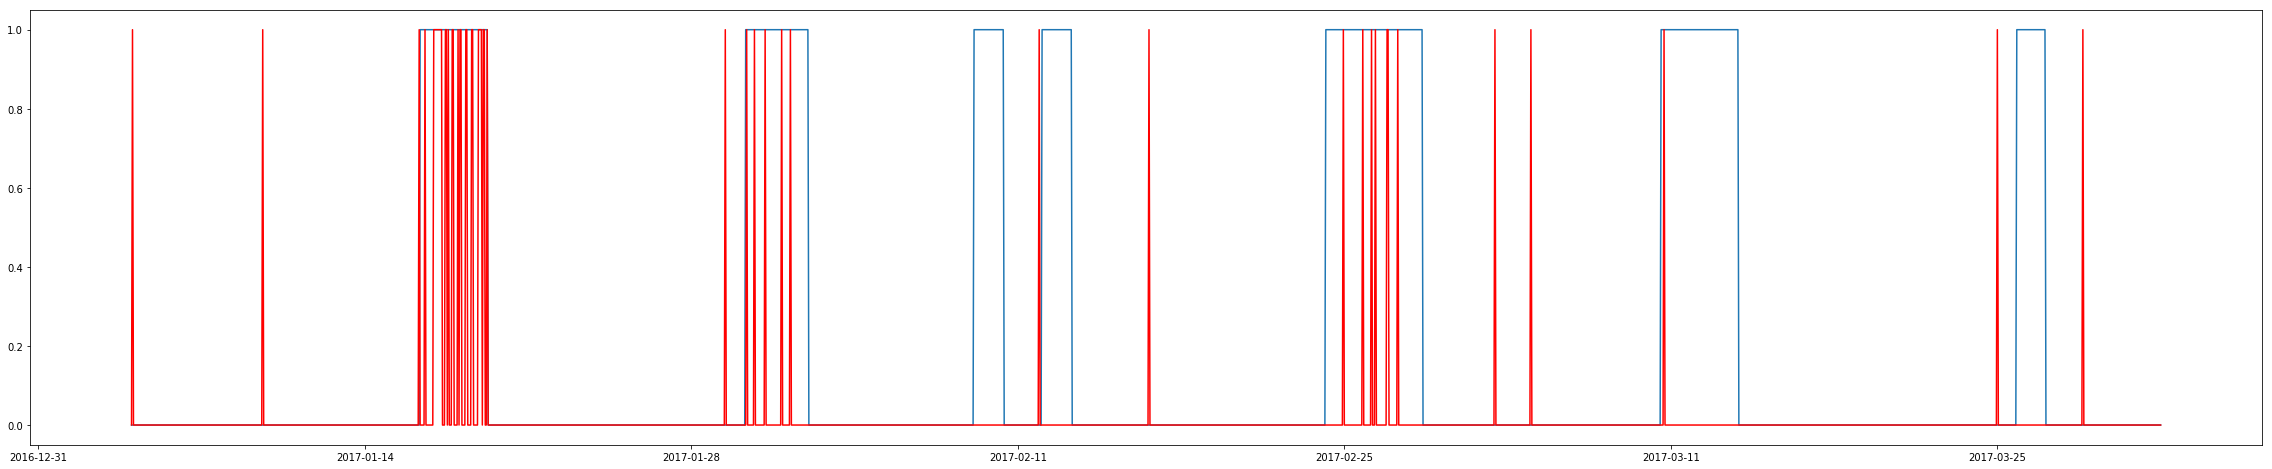

In [123]:
predic = np.zeros(len(test))
for i in range(len(prediction_test)): 
    if (test.columns[i] in available_sensors) and (len(prediction_test[i]) != 1):
        #print(test.columns[i])
        predic = predic + prediction_test[i].astype(int).T

prediction_opt =((predic!=0)*1).T

plt.figure(figsize=(40,8))
plt.plot(x,test_label)
plt.plot(prediction_opt, color='red')
plt.savefig('test_label.png', dpi=300, bbox_inches='tight')
plt.show()

In [113]:
#  true negatives  false positives
#  false negatives  true positives

cm=confusion_matrix(prediction_opt.astype(int),test_label.astype(int))
recall_opt= (cm[1][1]/(cm[0][1]+cm[1][1]))
precision_opt = (cm[1][1]/(cm[1][0]+cm[1][1]))

print(recall_opt)
print(precision_opt)

0.13267813267813267
0.75
